In [6]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# 1. Cargar el CSV:
#   - parse_dates=['Date']: convierte automáticamente la columna 'Date' a datetime
#   - index_col='Date': usa 'Date' como índice del DataFrame
df_ap = pd.read_csv(
    'data/Anexos_7/training/total_hospitalized_training_data.csv',
    parse_dates=['Date'],
    index_col='Date'
)

# 2. Aseguramos que el índice está en orden (opcional, pero útil para series de tiempo)
df_ap.sort_index(inplace=True)

# 3. Ver qué columnas tenemos
print("Columnas en df_ap:", df_ap.columns)

# 4. Ignorar las columnas que no son provincias
ignore_cols = ["Day", "Month", "Year", "DayOfYear"]

# 5. Creamos una lista con las columnas que SÍ son provincias
all_cols = [col for col in df_ap.columns if col not in ignore_cols]

provinces = all_cols[:-1]  # emulando provinces = provinces[:-1] del código original

print("Provinces (sin la última):", provinces)

# 6. Crear un diccionario donde cada llave sea la provincia y el valor sea el DataFrame correspondiente
province_data_dict = {}

for province in provinces:
    # Extraer solo la columna de cada provincia
    province_data = df_ap[[province]].copy()

    # Opcional: verificaciones de duplicados
    duplicate_dates = province_data.index.duplicated(keep=False)
    if duplicate_dates.any():
        print(f"Duplicate dates found for {province}:")
        print(province_data[duplicate_dates])

    # Verificar valores NaN
    nan_values = province_data.isna().sum()
    if nan_values.any():
        print(f"NaN values for {province}:")
        print(nan_values)

    # Verificar columnas de tipo 'object' (por si hay strings)
    for column in province_data.columns:
        if province_data[column].dtype == 'object':
            print(f"Column '{column}' in province '{province}' contains string data.")

    # Guardar cada DataFrame en el diccionario
    province_data_dict[province] = province_data

# Al final, province_data_dict contendrá un DataFrame para cada provincia (clave).


Columnas en df_ap: Index(['Pinar del Rio', 'Artemisa', 'La Habana', 'Mayabeque', 'Matanzas',
       'Villa Clara', 'Cienfuegos', 'Sancti Spiritus', 'Ciego de Ávila',
       'Camagüey', 'Las Tunas', 'Holguin', 'Granma', 'Santiago de Cuba',
       'Guantánamo', 'Isla de la Juventud'],
      dtype='object')
Provinces (sin la última): ['Pinar del Rio', 'Artemisa', 'La Habana', 'Mayabeque', 'Matanzas', 'Villa Clara', 'Cienfuegos', 'Sancti Spiritus', 'Ciego de Ávila', 'Camagüey', 'Las Tunas', 'Holguin', 'Granma', 'Santiago de Cuba', 'Guantánamo']


In [25]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

df_ap = pd.read_csv('data/ML_data_csv/anexo_circular_7_atencion_primaria.csv')
month_mapping = { 'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12 }
# Replace month names with numbers
df_ap['Mes'] = df_ap['Mes'].map(month_mapping)
# Ensure Dia, Mes, Año columns are of integer type
df_ap['Dia'] = df_ap['Dia'].astype(int)
df_ap['Mes'] = df_ap['Mes'].astype(int)
df_ap['Año'] = df_ap['Año'].astype(int)
print(df_ap[['Dia', 'Mes', 'Año']].isnull().sum())
df_ap['Date'] = pd.to_datetime(df_ap[['Dia', 'Mes', 'Año']].astype(str).agg('-'.join, axis=1), format='%d-%m-%Y')

df_ap.set_index('Date', inplace=True)
df_ap.drop(columns=['Dia', 'Mes', 'Año'], inplace=True)

provinces = df_ap['Provincias'].unique()
provinces = provinces[:-1] # to delete Total

province_data_dict = {}

# Iterate over each province and store the data in the dictionary
for province in provinces:
    province_data = df_ap[df_ap['Provincias'] == province]
    province_data.drop(columns=['Provincias'], inplace=True)
    province_data_dict[province] = province_data
    province_data_dict[province] = province_data_dict[province].sort_index()
    # Check for duplicate dates
    duplicate_dates = province_data_dict[province].index.duplicated(keep=False)
    if duplicate_dates.any():
        print(f"Duplicate dates found for {province}:")
        print(province_data_dict[province][duplicate_dates])

    # Check for NaN values
    nan_values = province_data.isna().sum()
    if nan_values.any():
        print(f"NaN values for {province}:")
        print(nan_values)
    # Check for string data types
    for column in province_data.columns:
        if province_data[column].dtype == 'object':
            print(f"Column '{column}' in province '{province}' contains string data.")


Dia    0
Mes    0
Año    0
dtype: int64


C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Duplicate dates found for Pinar del Rio:
            Hogar_I_Total  Hogar_I_<19años  Hogar_A_Recuperados  \
Date                                                              
2023-09-03            104               43                   88   
2023-09-03             46               15                   36   

            Hogar_A_Remitidos_ingreso_institucional  Hogar_A_Fallecidos  \
Date                                                                      
2023-09-03                                        0                 0.0   
2023-09-03                                        0                 0.0   

            Hogar_A_Total  Hogar_PI_Total  Hogar_PI_<19años  \
Date                                                          
2023-09-03             88             686               153   
2023-09-03             36             670               155   

            Policlinico_I_Total  Policlinico_I_<19años  ...  ADAP_Fallecidos  \
Date                                                    

C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)


            Hogar_I_Total  Hogar_I_<19años  Hogar_A_Recuperados  \
Date                                                              
2023-09-03             17               11                   15   
2023-09-03             13                3                   16   

            Hogar_A_Remitidos_ingreso_institucional  Hogar_A_Fallecidos  \
Date                                                                      
2023-09-03                                        0                 0.0   
2023-09-03                                        0                 0.0   

            Hogar_A_Total  Hogar_PI_Total  Hogar_PI_<19años  \
Date                                                          
2023-09-03             15             137                58   
2023-09-03             16             135                49   

            Policlinico_I_Total  Policlinico_I_<19años  ...  ADAP_Fallecidos  \
Date                                                    ...                    
2023-09-03       

C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Duplicate dates found for Sancti Spiritus:
            Hogar_I_Total  Hogar_I_<19años  Hogar_A_Recuperados  \
Date                                                              
2023-09-03            122                5                   27   
2023-09-03             27                2                   83   

            Hogar_A_Remitidos_ingreso_institucional  Hogar_A_Fallecidos  \
Date                                                                      
2023-09-03                                        0                 0.0   
2023-09-03                                        0                 0.0   

            Hogar_A_Total  Hogar_PI_Total  Hogar_PI_<19años  \
Date                                                          
2023-09-03             27             122                 5   
2023-09-03             83              27                 2   

            Policlinico_I_Total  Policlinico_I_<19años  ...  ADAP_Fallecidos  \
Date                                                  

C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Duplicate dates found for Las Tunas:
            Hogar_I_Total  Hogar_I_<19años  Hogar_A_Recuperados  \
Date                                                              
2023-09-03             90               15                   71   
2023-09-03             16                4                    4   

            Hogar_A_Remitidos_ingreso_institucional  Hogar_A_Fallecidos  \
Date                                                                      
2023-09-03                                        0                 0.0   
2023-09-03                                        0                 0.0   

            Hogar_A_Total  Hogar_PI_Total  Hogar_PI_<19años  \
Date                                                          
2023-09-03             71             240                44   
2023-09-03              4             221                39   

            Policlinico_I_Total  Policlinico_I_<19años  ...  ADAP_Fallecidos  \
Date                                                    ... 

C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)


Duplicate dates found for Santiago de Cuba:
            Hogar_I_Total  Hogar_I_<19años  Hogar_A_Recuperados  \
Date                                                              
2023-09-03             59                9                   47   
2023-09-03             16                0                   28   

            Hogar_A_Remitidos_ingreso_institucional  Hogar_A_Fallecidos  \
Date                                                                      
2023-09-03                                        2                 0.0   
2023-09-03                                        0                 0.0   

            Hogar_A_Total  Hogar_PI_Total  Hogar_PI_<19años  \
Date                                                          
2023-09-03             49             241                31   
2023-09-03             28             231                28   

            Policlinico_I_Total  Policlinico_I_<19años  ...  ADAP_Fallecidos  \
Date                                                 

C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)
C:\Users\Melissa\AppData\Local\Temp\ipykernel_11596\4107669552.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  province_data.drop(columns=['Provincias'], inplace=True)


In [26]:

 ##	Policlinico_PI_<19años	TotalAPS_I_Total	TotalAPS_I_<19años	TotalAPS_A_Recuperados	TotalAPS_A_Remitidos	TotalAPS_A_Fallecidos	TotalAPS_A_Total	TotalAPS_PI_Total	TotalAPS_PI_<19años	PIDA_hogar	PIDA_hogar_<19años	PIDA_hospitalizaciÃ³n	PIDA_hospitalizaciÃ³n_<19años	ValidaciÃ³n_PIactual	ADAH_Ingresos	ADAH_AltasRecuperados	ADAH_Fallecidos	DH_Ingresos	DH_AltasRecuperados	DH_Fallecidos	AAH_Ingresos	AAH_AltasRecuperados	AAH_Fallecidos	ADAP_Ingresos	ADAP_AltasRecuperados	ADAP_Fallecidos	DP_Ingresos	DP_AltasRecuperados	DP_Fallecidos	AAP_Ingresos	AAP_AltasRecuperados	AAP_Fallecidos	AATotalAPS_Ingresos	AATotalAPS_AltasRecuperados	AATotalAPS_Fallecidos

def auto_arima_train(province_data_dict, field):
    models = {}
    test_sets = {}
    d_from_diff = {}
    train_sets = {}



    # Iterate over each province
    for province in province_data_dict.keys():
        # Filter data for the current province
        province_data = province_data_dict[province]

        # Extract the series to be predicted
        try:
            series = province_data[field]
        except:
            continue
        print(field)
        print(province)
        print()

        # Split the data into training and test sets
        train_size = int(len(series) * 0.8)
        train, test = series[:train_size], series[train_size:]
        test_sets[province] = test
        train_sets[province] = train

        # Use auto_arima to find the best parameters on the training set
        model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
        models[province] = model

        if train.nunique() == 1:
            print(f"The series for province '{province}' is constant.\n")
            d_from_diff[province] = 0
            continue

        # Check for stationarity and apply differencing if needed
        d = 0
        result = adfuller(train)
        while result[1] > 0.05:
            train = train.diff().dropna()
            d += 1
            result = adfuller(train)
        d_from_diff[province] = d
        print(f"Best parameters for province '{province}': (d={d} from differencing, d={model.order[1]} d from AutoArima)\n")
        # Create subplots for ACF and PACF
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        plot_acf(train, ax=axes[0])
        plot_pacf(train, ax=axes[1])
        axes[0].set_title(f'ACF for {province} (MA={model.order[2]})')
        axes[1].set_title(f'PACF for {province} (AR={model.order[0]})')
        plt.tight_layout()
        plt.show()
    return models, test_sets, d_from_diff, train_sets



#     # Fit ARIMA model (example with p=1, d=1, q=1)
#     model = ARIMA(series, order=(1, 1, 1))
#     model_fit = model.fit()
#     print(model_fit.summary())

#     # Forecast
#     forecast = model_fit.forecast(steps=10)
#     predictions[province] = forecast

# # Print predictions
# for province, forecast in predictions.items():
#     print(f'Predictions for {province}:')
#     print(forecast)


def evaluate_models(models, test_sets, d_from_diff,train_sets, field):

    for province in models.keys():
        auto_model = models[province]
        test = test_sets[province]

        auto_predictions = auto_model.predict(n_periods=len(test))
        d = d_from_diff[province]
        # Fit ARIMA model on the training set
        model = ARIMA(train_sets[province], order = (auto_model.order[0], d, auto_model.order[2]))
        model_fit = model.fit()
        # Make predictions on the test set
        predictions = model_fit.forecast(steps=len(test))
        print(f' AutoArima Predictions for {province}: {field}. d = {auto_model.order[1]}')
        print(auto_predictions)
        print()
        print(f'Arima Predictions for {province}: {field}. d = {d}')
        print(predictions)


        # Calculate evaluation metrics
        auto_mae = mean_absolute_error(test, auto_predictions)
        auto_mse = mean_squared_error(test, auto_predictions)
        auto_rmse = np.sqrt(auto_mse)
        auto_mape = np.mean(np.abs((test - auto_predictions) / test)) * 100
        auto_nmse = auto_mse / np.var(test)
        # Calculate evaluation metrics
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((test - predictions) / test)) * 100
        nmse = mse / np.var(test)

        print(f'MAE for autoArima: {auto_mae}')
        print(f'MSE for autoArima: {auto_mse}')
        print(f'RMSE for autoArima: {auto_rmse}')
        print(f'MAPE for autoArima: {auto_mape}%')
        print(f'NMSEfor autoArima: {auto_nmse}')

        print()
        print(f'MAE for ARIMA: {mae}')
        print(f'MSE for ARIMA: {mse}')
        print(f'RMSE for ARIMA: {rmse}')
        print(f'MAPE for ARIMA: {mape}%')
        print(f'NMSE for ARIMA: {nmse}')

        # Plot actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(test.index, test, 'o', label='Actual') # Use 'o' for markers
        plt.plot(test.index, auto_predictions, 'x', label='AutoArima Predicted', color='red') # Use 'x' for markers
        plt.legend()
        plt.show()

        # Plot actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(test.index, test, 'o', label='Actual') # Use 'o' for markers
        plt.plot(test.index, predictions, 'x', label='Arima Predicted', color='red') # Use 'x' for markers
        plt.legend()
        plt.show()
        print(model_fit.summary())


Incomes

AATotalAPS_Ingresos
Pinar del Rio

Best parameters for province 'Pinar del Rio': (d=1 from differencing, d=0 d from AutoArima)



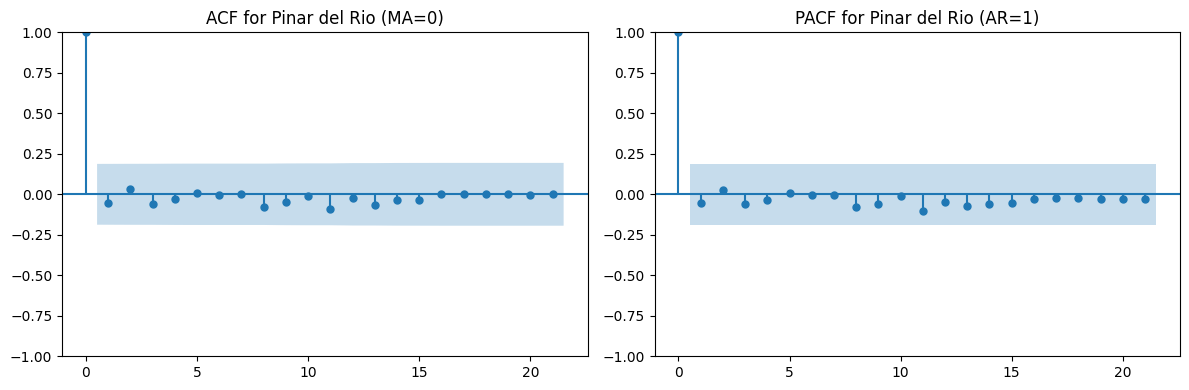

AATotalAPS_Ingresos
Artemisa

Best parameters for province 'Artemisa': (d=1 from differencing, d=0 d from AutoArima)



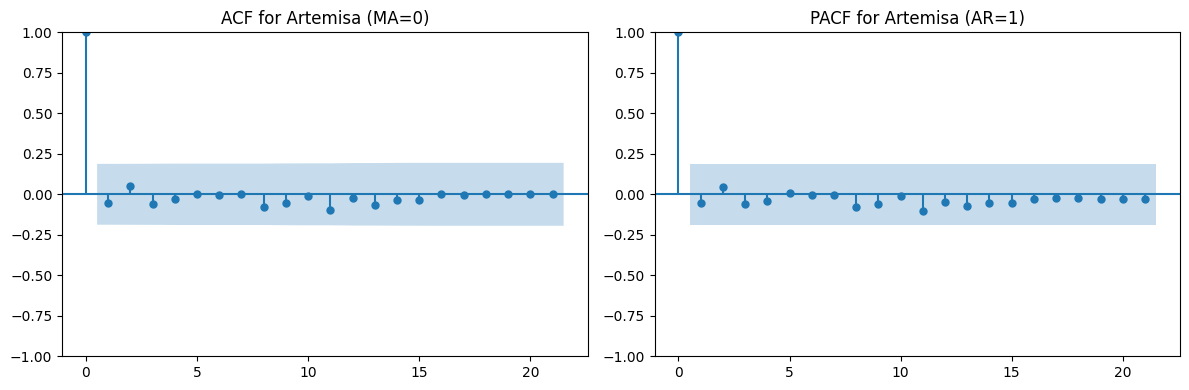

AATotalAPS_Ingresos
La Habana

Best parameters for province 'La Habana': (d=1 from differencing, d=0 d from AutoArima)



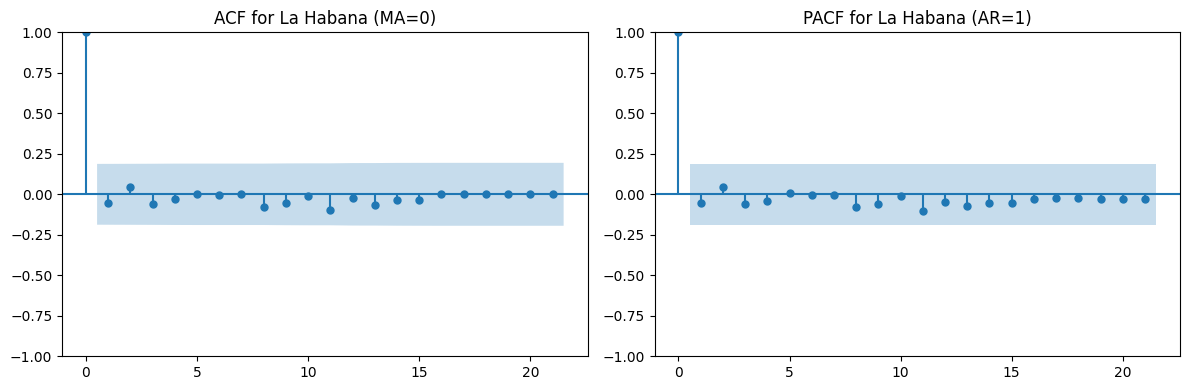

AATotalAPS_Ingresos
Mayabeque

Best parameters for province 'Mayabeque': (d=1 from differencing, d=0 d from AutoArima)



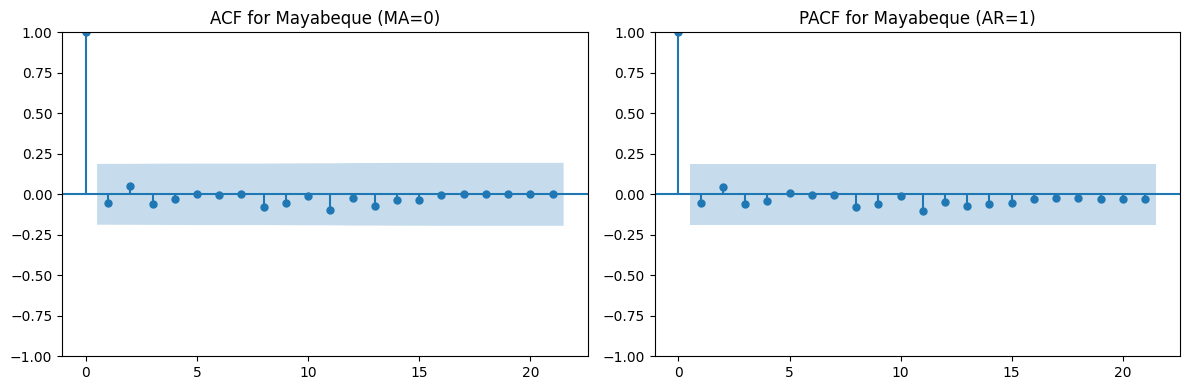

AATotalAPS_Ingresos
Matanzas

Best parameters for province 'Matanzas': (d=1 from differencing, d=0 d from AutoArima)



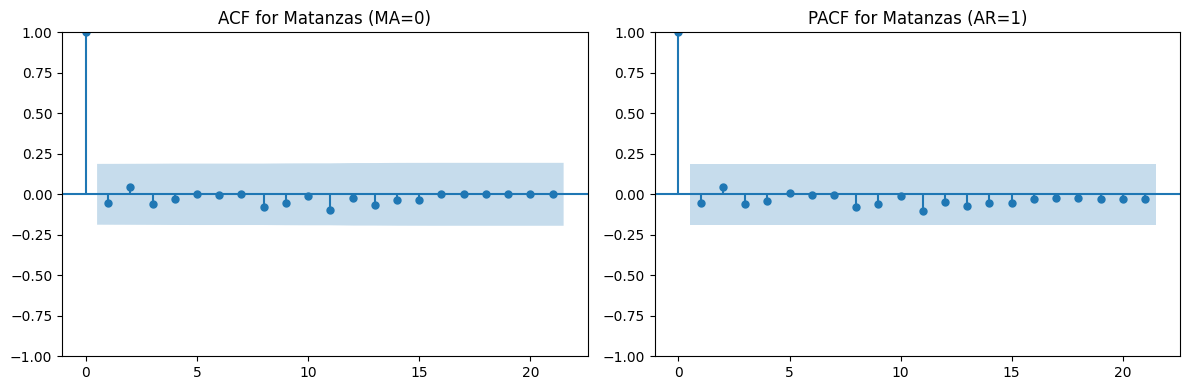

AATotalAPS_Ingresos
Villa Clara

Best parameters for province 'Villa Clara': (d=1 from differencing, d=0 d from AutoArima)



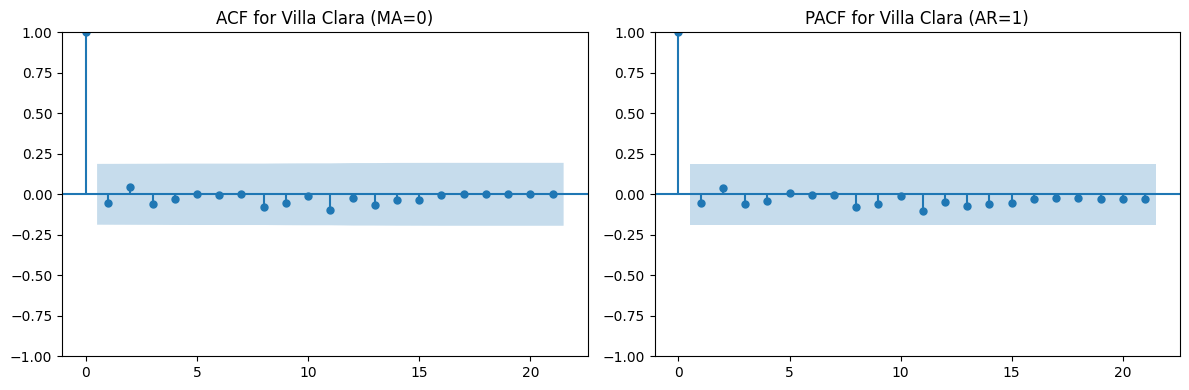

AATotalAPS_Ingresos
Cienfuegos

Best parameters for province 'Cienfuegos': (d=1 from differencing, d=0 d from AutoArima)



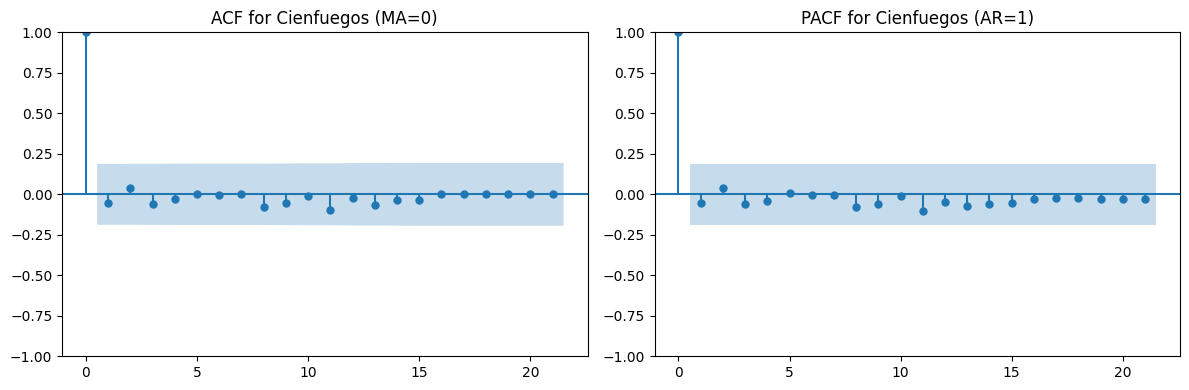

AATotalAPS_Ingresos
Sancti Spiritus

Best parameters for province 'Sancti Spiritus': (d=1 from differencing, d=0 d from AutoArima)



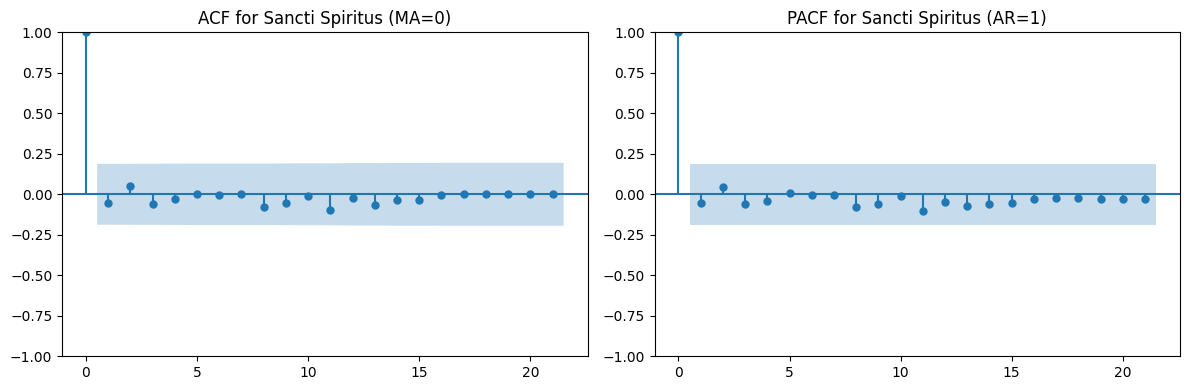

AATotalAPS_Ingresos
Ciego de Ávila

Best parameters for province 'Ciego de Ávila': (d=1 from differencing, d=0 d from AutoArima)



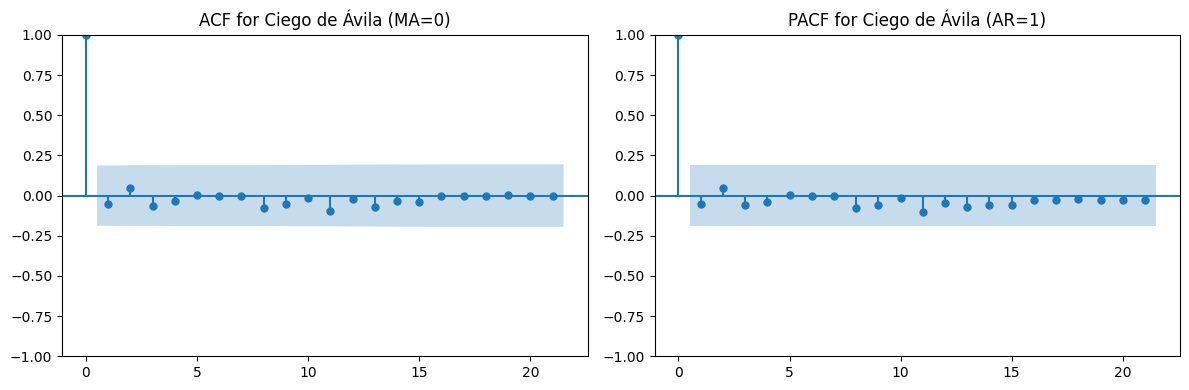

AATotalAPS_Ingresos
Camagüey

Best parameters for province 'Camagüey': (d=1 from differencing, d=0 d from AutoArima)



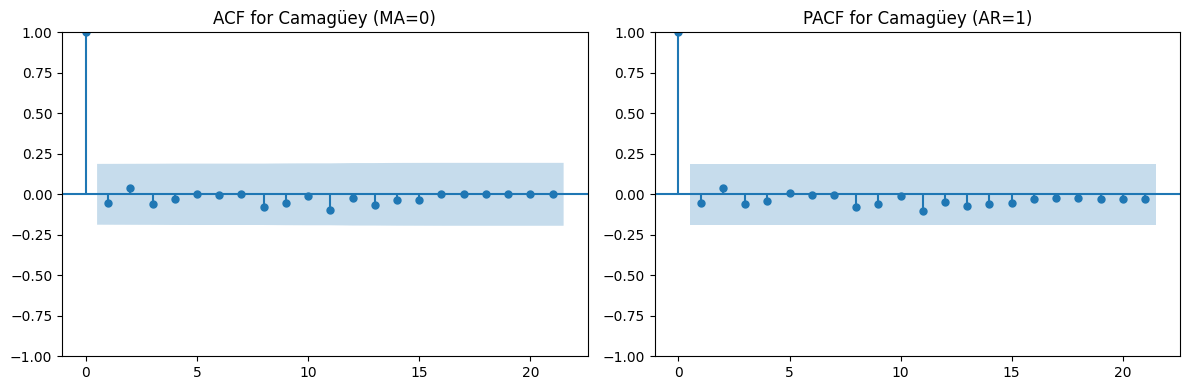

AATotalAPS_Ingresos
Las Tunas

Best parameters for province 'Las Tunas': (d=1 from differencing, d=0 d from AutoArima)



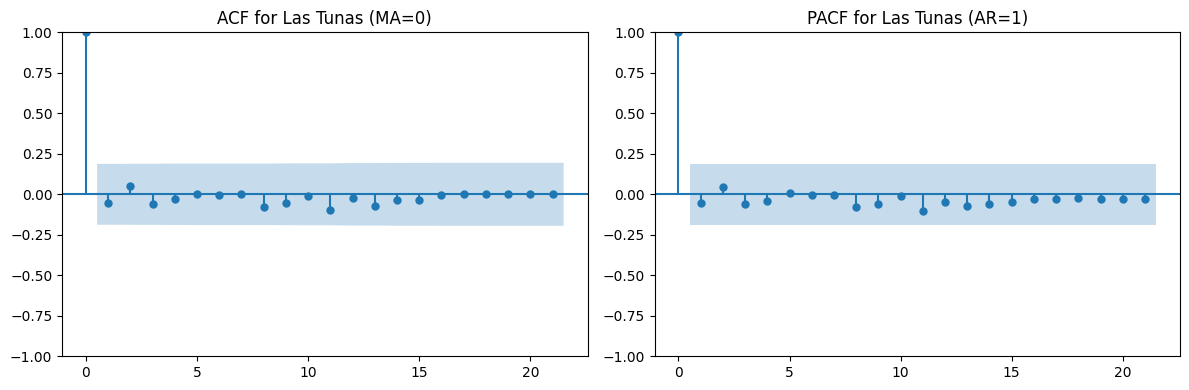

AATotalAPS_Ingresos
Holguin

Best parameters for province 'Holguin': (d=1 from differencing, d=0 d from AutoArima)



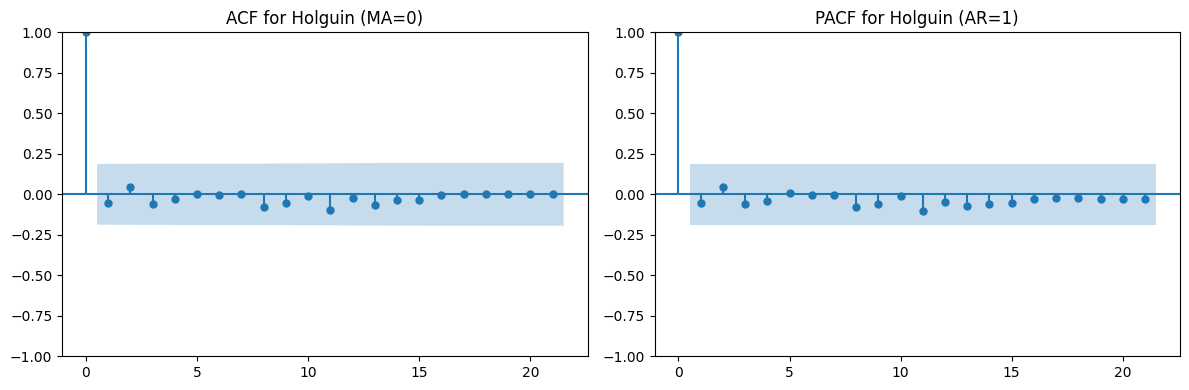

AATotalAPS_Ingresos
Granma

Best parameters for province 'Granma': (d=1 from differencing, d=0 d from AutoArima)



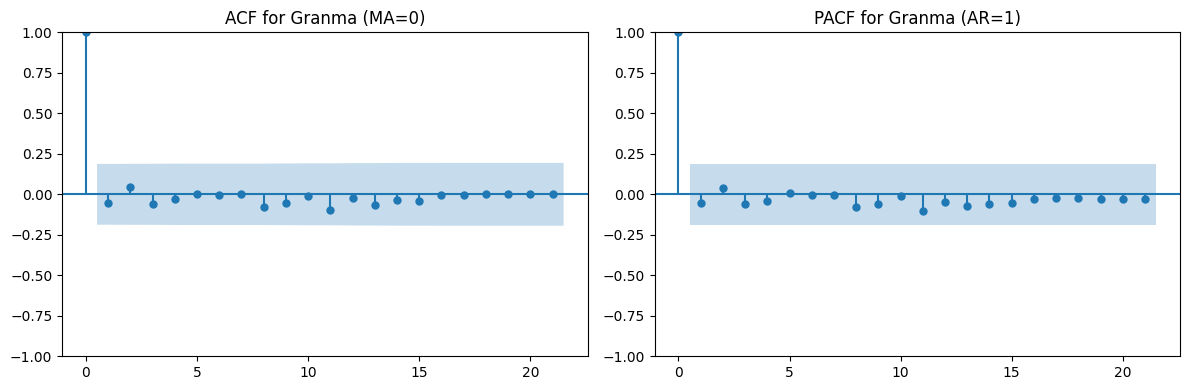

AATotalAPS_Ingresos
Santiago de Cuba

Best parameters for province 'Santiago de Cuba': (d=1 from differencing, d=0 d from AutoArima)



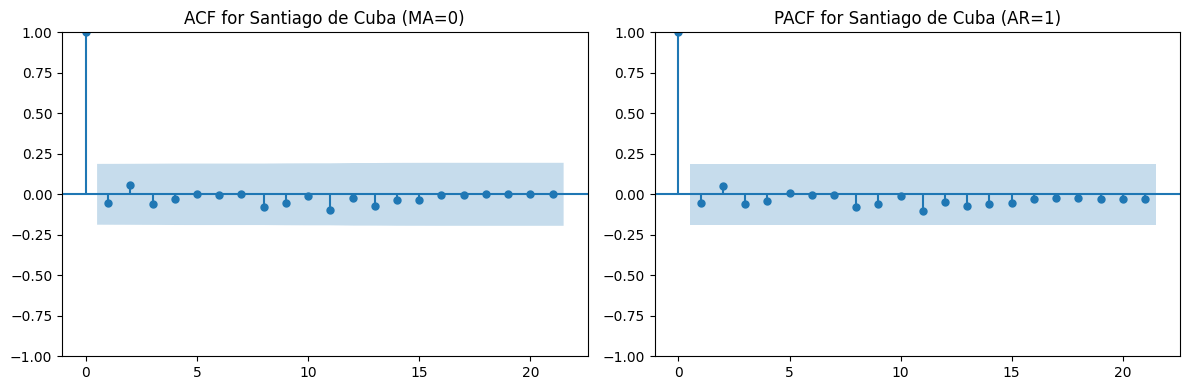

AATotalAPS_Ingresos
Guantánamo

Best parameters for province 'Guantánamo': (d=1 from differencing, d=0 d from AutoArima)



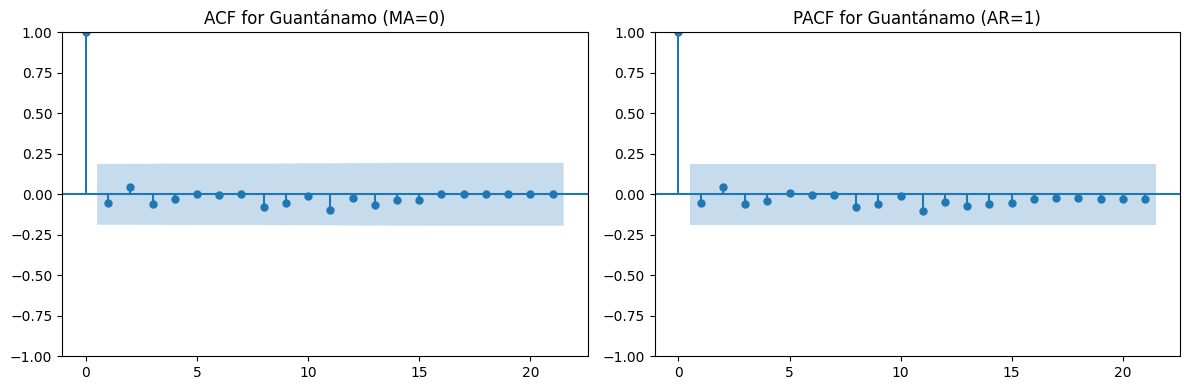

AATotalAPS_Ingresos
Isla de la Juventud

Best parameters for province 'Isla de la Juventud': (d=1 from differencing, d=0 d from AutoArima)



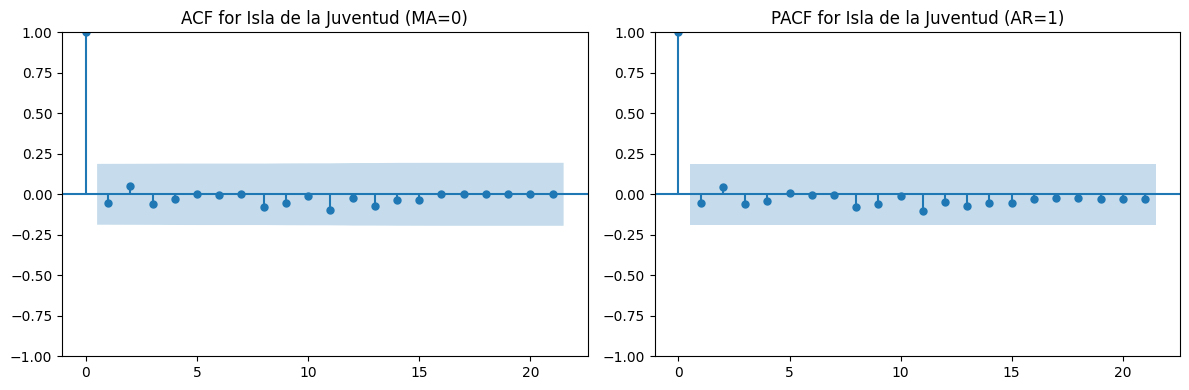

In [27]:
models, test_sets, d_from_diff, train_sets = auto_arima_train(province_data_dict, "AATotalAPS_Ingresos")

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

 AutoArima Predictions for Pinar del Rio: AATotalAPS_Ingresos. d = 0
110    28148.135214
111    25305.573812
112    22750.070691
113    20452.637047
114    18387.211533
115    16530.364626
116    14861.032854
117    13360.279853
118    12011.081565
119    10798.133119
120     9707.675219
121     8727.338061
122     7846.001015
123     7053.666480
124     6341.346465
125     5700.960643
126     5125.244684
127     4607.667849
128     4142.358915
129     3724.039568
130     3347.964525
131     3009.867715
132     2705.913875
133     2432.655050
134     2186.991481
135     1966.136440
136     1767.584617
137     1589.083705
dtype: float64

Arima Predictions for Pinar del Rio: AATotalAPS_Ingresos. d = 1
110    31304.208104
111    31304.530662
112    31304.512699
113    31304.513699
114    31304.513643
115    31304.513646
116    31304.513646
117    31304.513646
118    31304.513646
119    31304.513646
120    31304.513646
121    31304.513646
122    31304.513646
123    31304.513646
124    3130

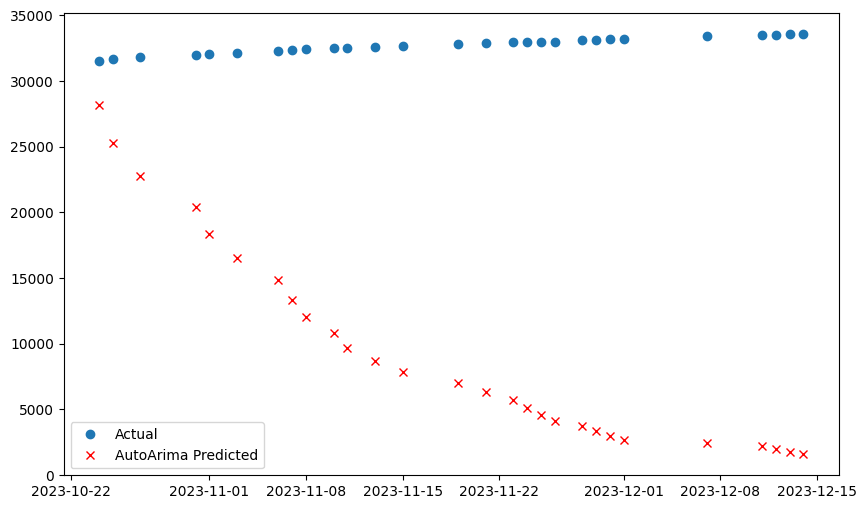

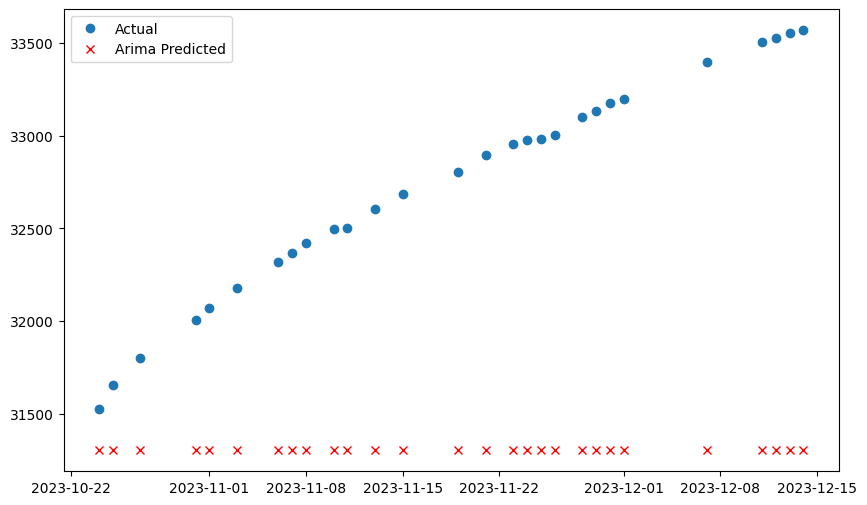

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1330.087
Date:                 Wed, 29 Jan 2025   AIC                           2664.173
Time:                         10:55:34   BIC                           2669.556
Sample:                              0   HQIC                          2666.356
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0557      0.077     -0.720      0.471      -0.207       0.096
sigma2      2.347e+09   1.12e-10    2.1e+19      0.000    2.35e+09    2.35e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

MAE for autoArima: 6999.884640408339
MSE for autoArima: 55352133.87209145
RMSE for autoArima: 7439.901469246179
MAPE for autoArima: nan%
NMSEfor autoArima: 229.0501050945295

MAE for ARIMA: 1030.110560511856
MSE for ARIMA: 1302776.97822491
RMSE for ARIMA: 1141.3925609644168
MAPE for ARIMA: nan%
NMSE for ARIMA: 5.390961159089174


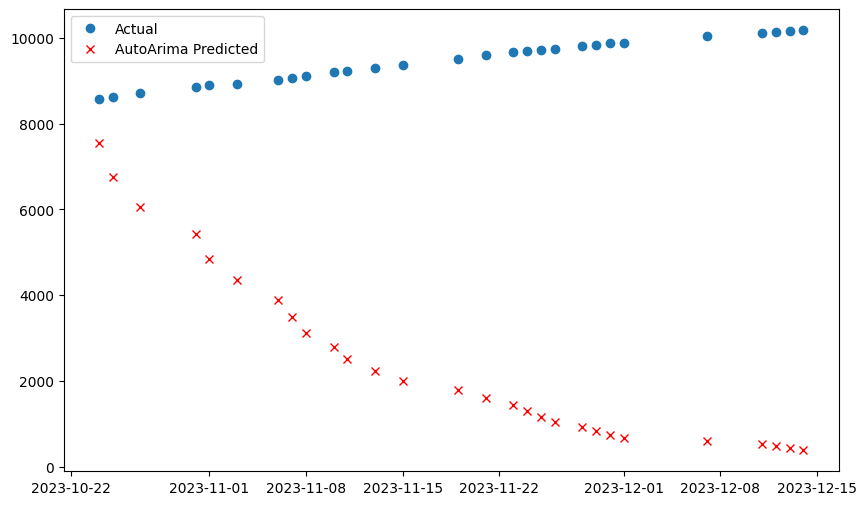

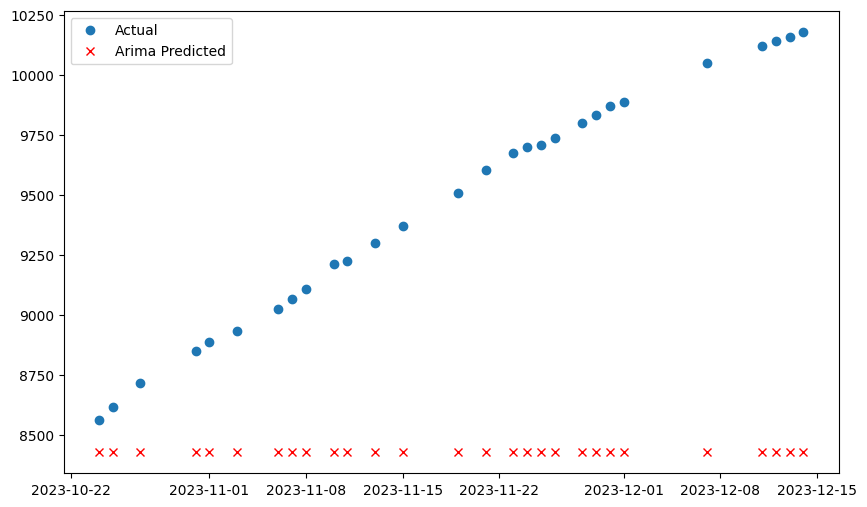

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1330.108
Date:                 Wed, 29 Jan 2025   AIC                           2664.217
Time:                         10:55:37   BIC                           2669.600
Sample:                              0   HQIC                          2666.400
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.078     -0.701      0.483      -0.207       0.098
sigma2      2.348e+09   1.13e-10   2.08e+19      0.000    2.35e+09    2.35e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

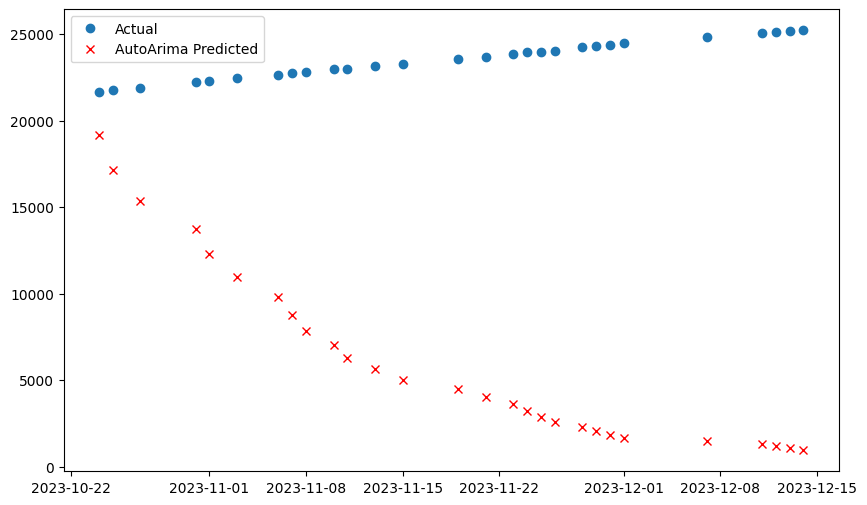

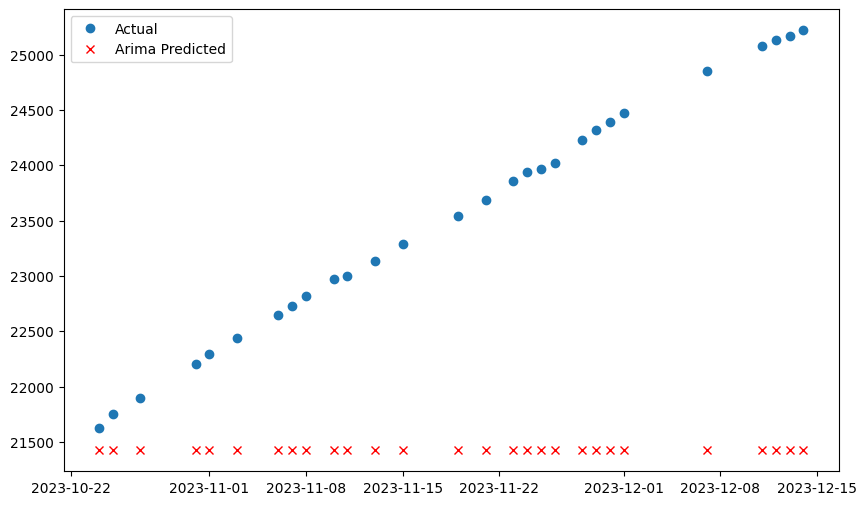

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1452.058
Date:                 Wed, 29 Jan 2025   AIC                           2908.117
Time:                         10:55:40   BIC                           2913.499
Sample:                              0   HQIC                          2910.300
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.078     -0.703      0.482      -0.207       0.098
sigma2      2.201e+10   1.21e-11   1.83e+21      0.000     2.2e+10     2.2e+10
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

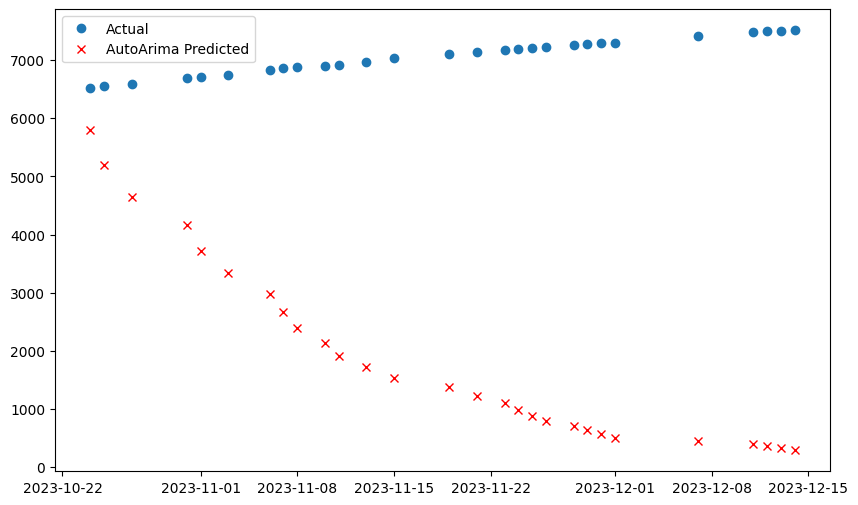

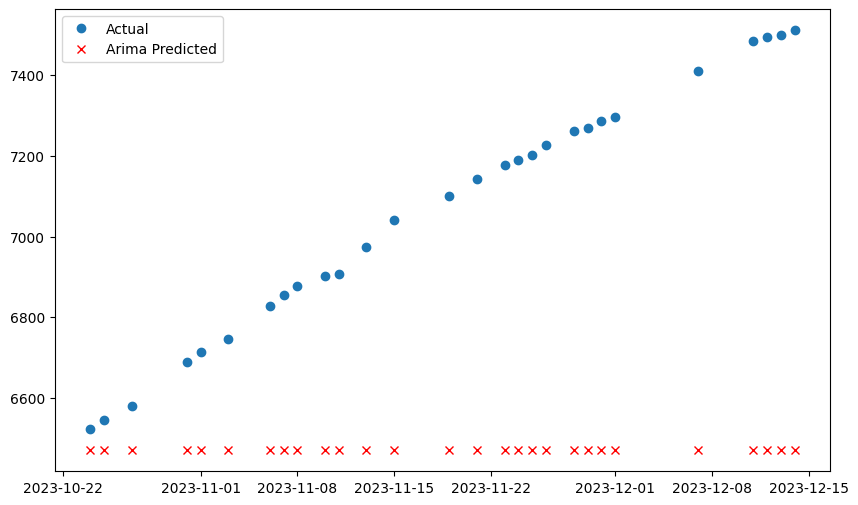

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1310.763
Date:                 Wed, 29 Jan 2025   AIC                           2625.526
Time:                         10:55:42   BIC                           2630.909
Sample:                              0   HQIC                          2627.709
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0549      0.078     -0.707      0.479      -0.207       0.097
sigma2      1.647e+09    1.6e-10   1.03e+19      0.000    1.65e+09    1.65e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

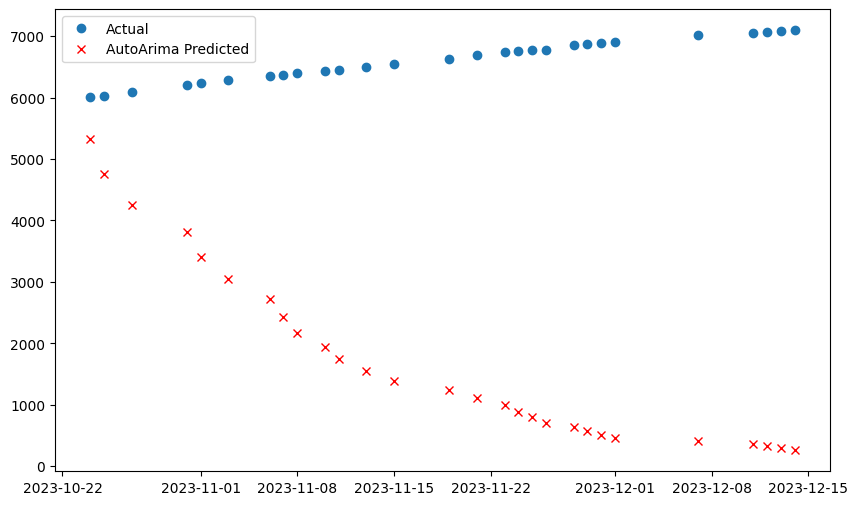

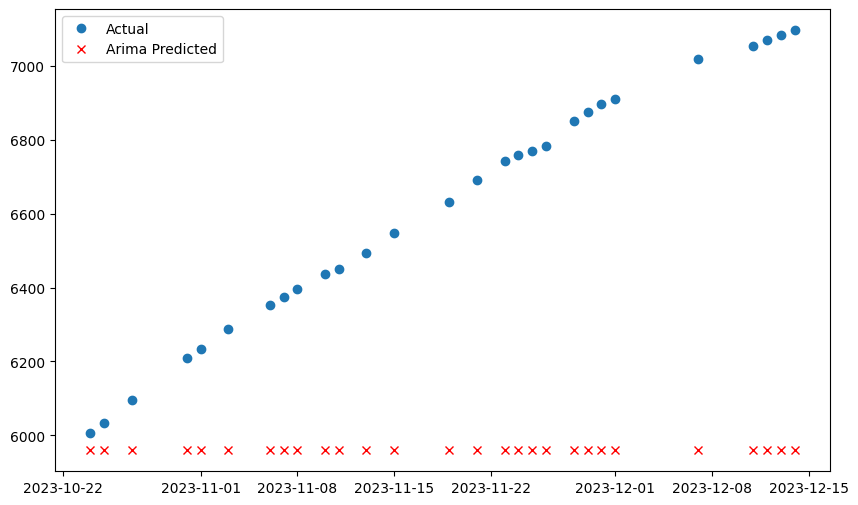

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1337.141
Date:                 Wed, 29 Jan 2025   AIC                           2678.281
Time:                         10:55:44   BIC                           2683.664
Sample:                              0   HQIC                          2680.464
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.078     -0.703      0.482      -0.207       0.098
sigma2      2.672e+09   9.91e-11    2.7e+19      0.000    2.67e+09    2.67e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

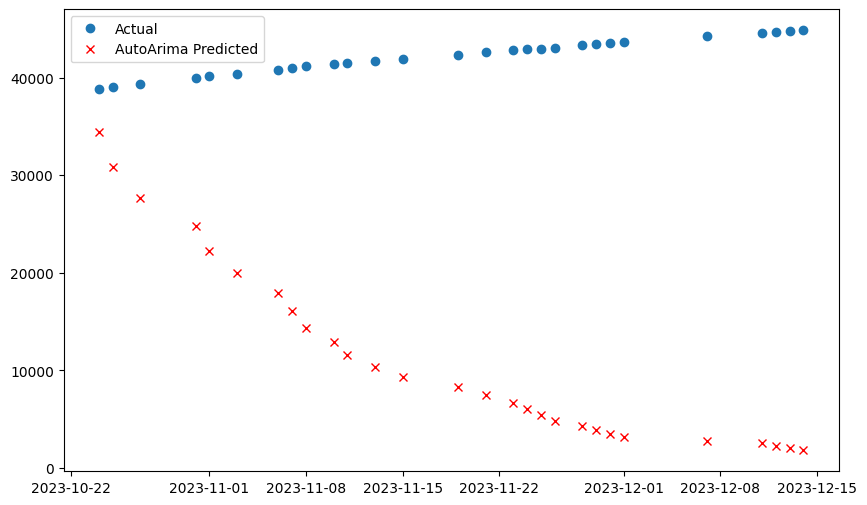

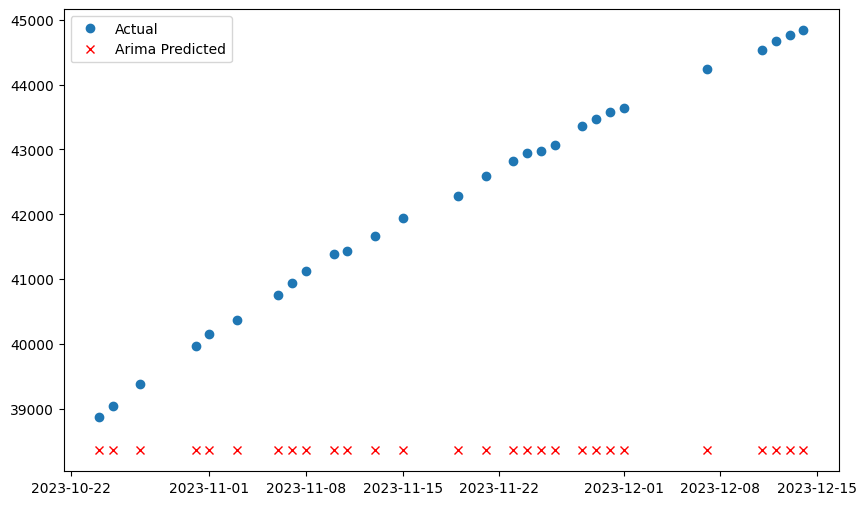

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1399.388
Date:                 Wed, 29 Jan 2025   AIC                           2802.777
Time:                         10:55:46   BIC                           2808.160
Sample:                              0   HQIC                          2804.960
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0549      0.078     -0.707      0.479      -0.207       0.097
sigma2      8.372e+09   3.16e-11   2.65e+20      0.000    8.37e+09    8.37e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

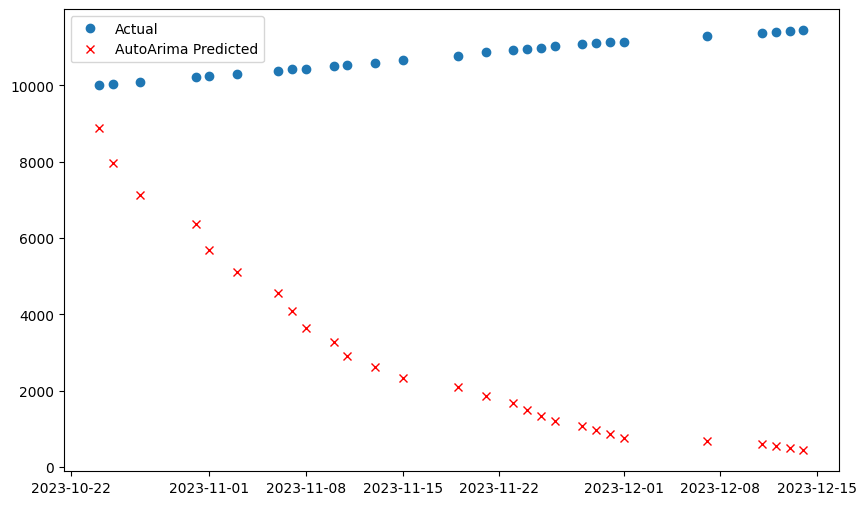

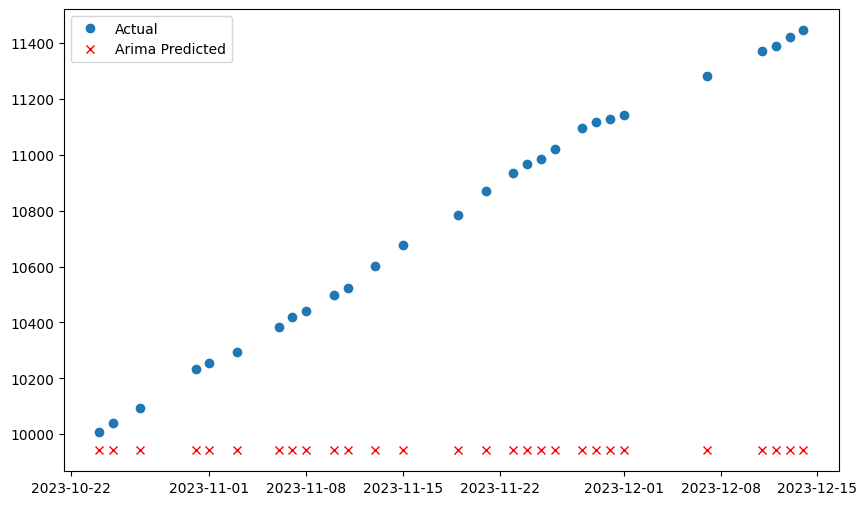

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1304.343
Date:                 Wed, 29 Jan 2025   AIC                           2612.686
Time:                         10:55:47   BIC                           2618.069
Sample:                              0   HQIC                          2614.869
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0548      0.078     -0.707      0.480      -0.207       0.097
sigma2      1.464e+09    1.8e-10   8.13e+18      0.000    1.46e+09    1.46e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

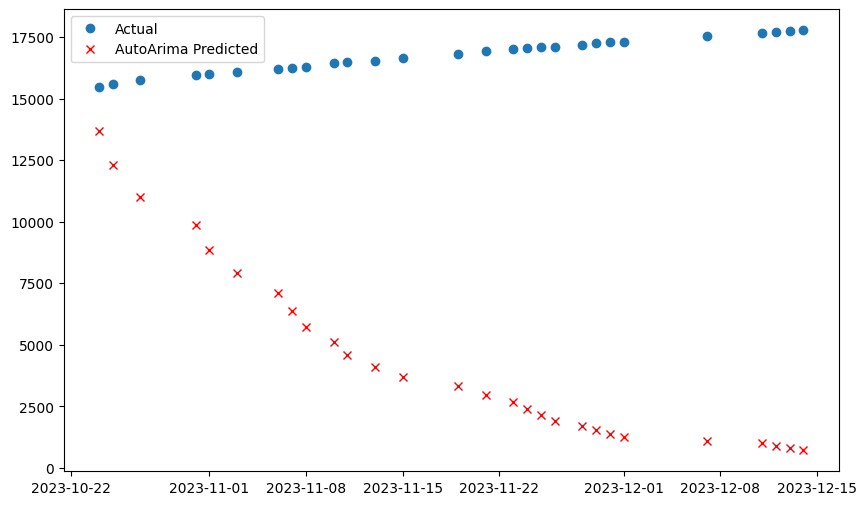

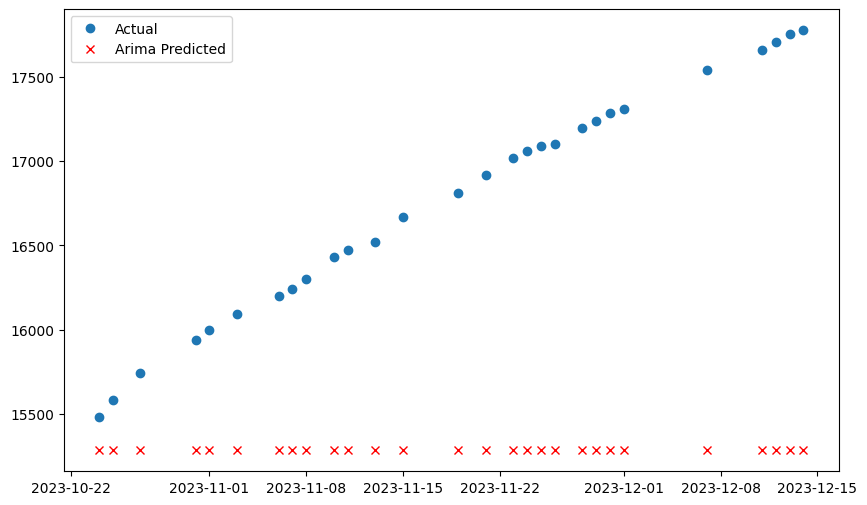

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1346.409
Date:                 Wed, 29 Jan 2025   AIC                           2696.819
Time:                         10:55:49   BIC                           2702.201
Sample:                              0   HQIC                          2699.002
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0548      0.078     -0.705      0.481      -0.207       0.098
sigma2      3.167e+09   8.36e-11   3.79e+19      0.000    3.17e+09    3.17e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

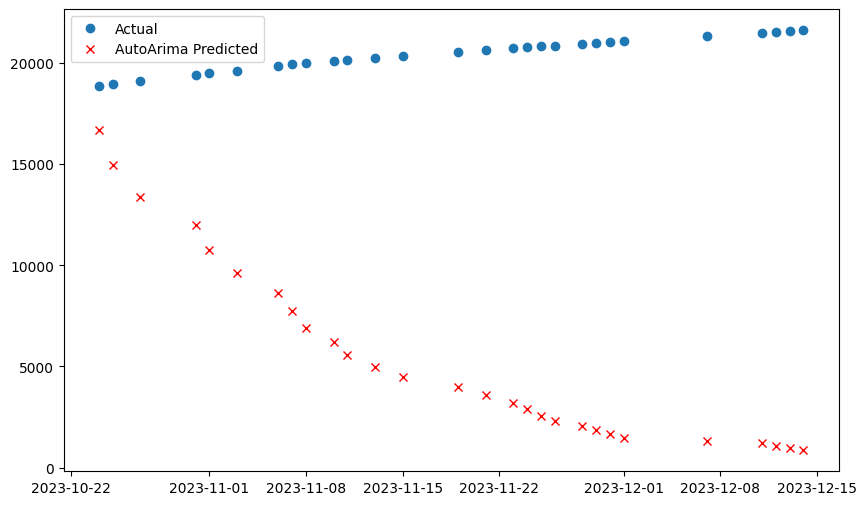

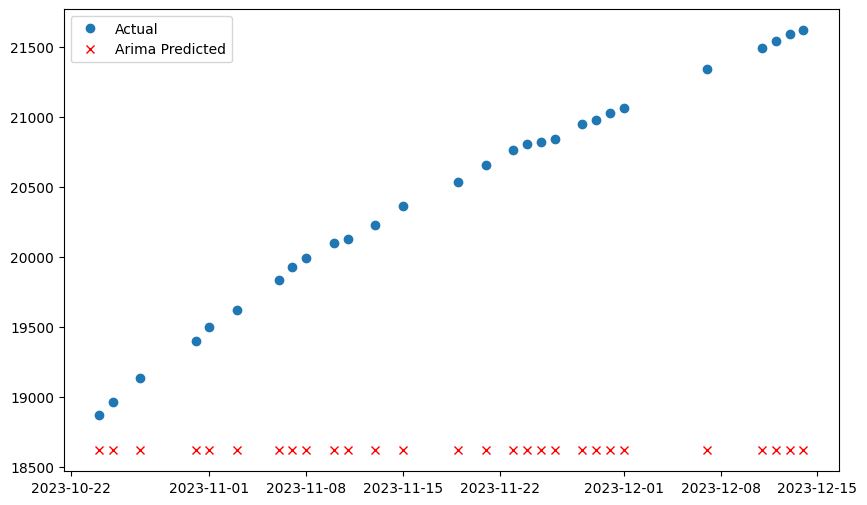

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1349.674
Date:                 Wed, 29 Jan 2025   AIC                           2703.348
Time:                         10:55:51   BIC                           2708.730
Sample:                              0   HQIC                          2705.530
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0547      0.078     -0.702      0.483      -0.207       0.098
sigma2      3.363e+09    7.9e-11   4.25e+19      0.000    3.36e+09    3.36e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

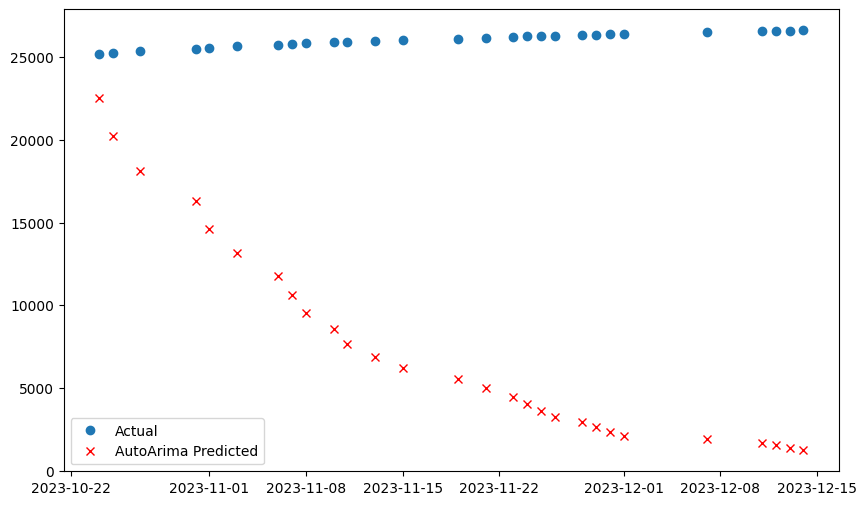

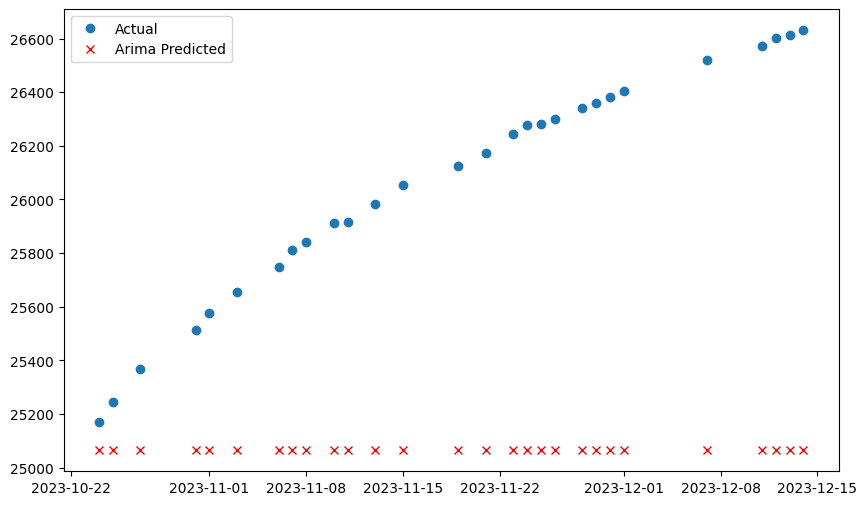

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1340.787
Date:                 Wed, 29 Jan 2025   AIC                           2685.575
Time:                         10:55:53   BIC                           2690.958
Sample:                              0   HQIC                          2687.758
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0551      0.077     -0.712      0.476      -0.207       0.097
sigma2      2.857e+09   9.19e-11   3.11e+19      0.000    2.86e+09    2.86e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

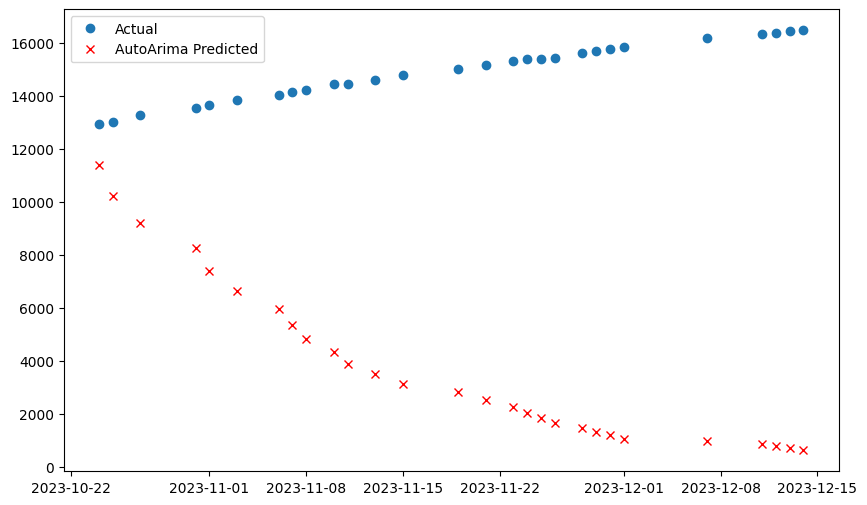

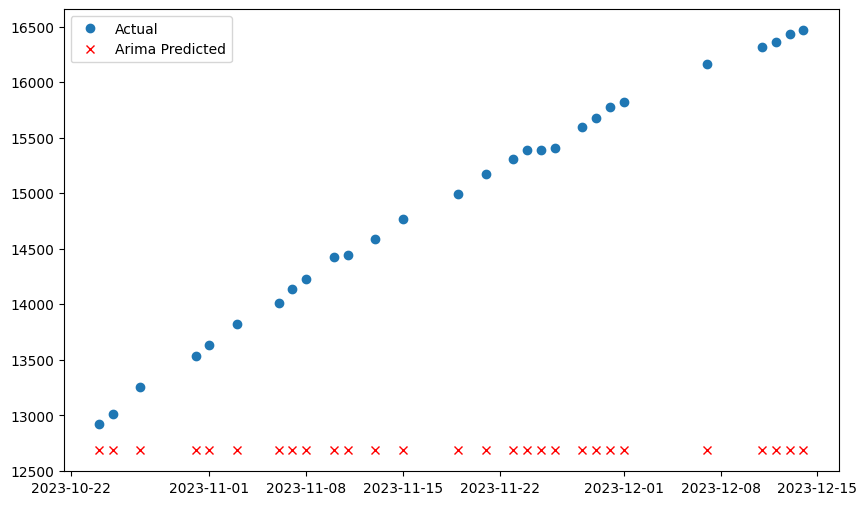

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1267.996
Date:                 Wed, 29 Jan 2025   AIC                           2539.992
Time:                         10:55:54   BIC                           2545.375
Sample:                              0   HQIC                          2542.175
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0549      0.077     -0.711      0.477      -0.206       0.097
sigma2      7.513e+08   3.48e-10   2.16e+18      0.000    7.51e+08    7.51e+08
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

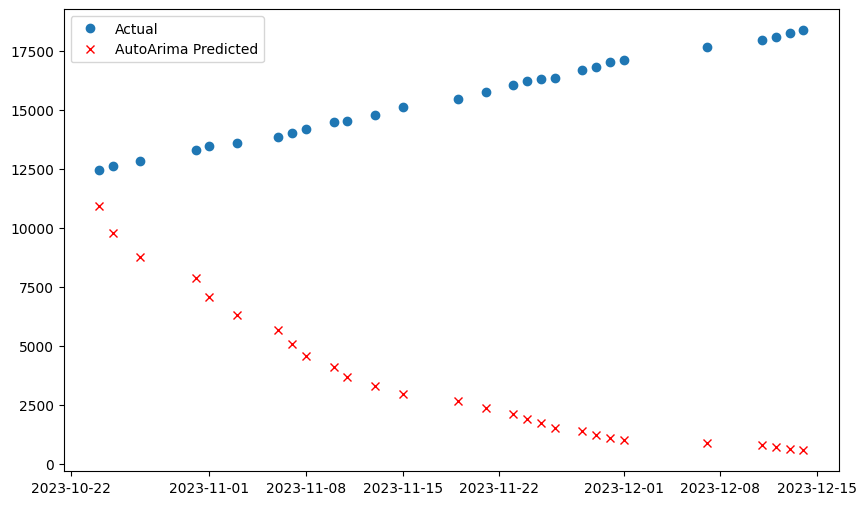

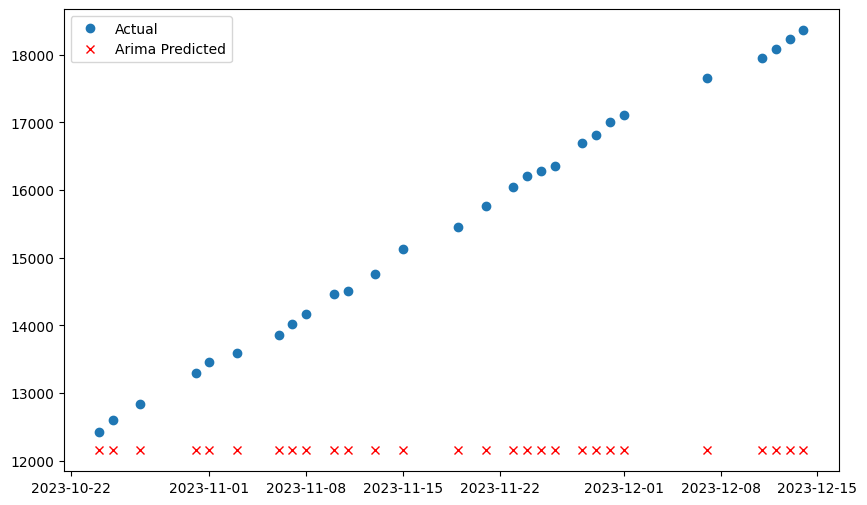

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1285.022
Date:                 Wed, 29 Jan 2025   AIC                           2574.044
Time:                         10:55:56   BIC                           2579.426
Sample:                              0   HQIC                          2576.227
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      0.078     -0.705      0.481      -0.207       0.097
sigma2      1.027e+09   2.57e-10      4e+18      0.000    1.03e+09    1.03e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

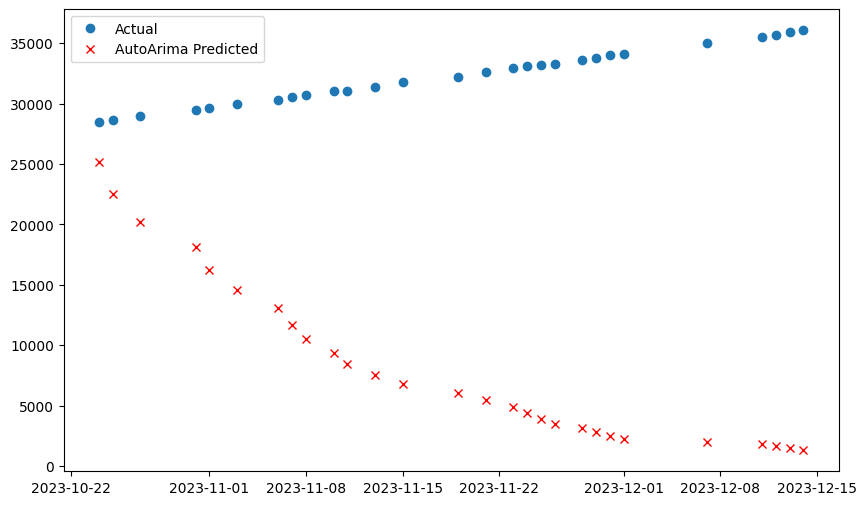

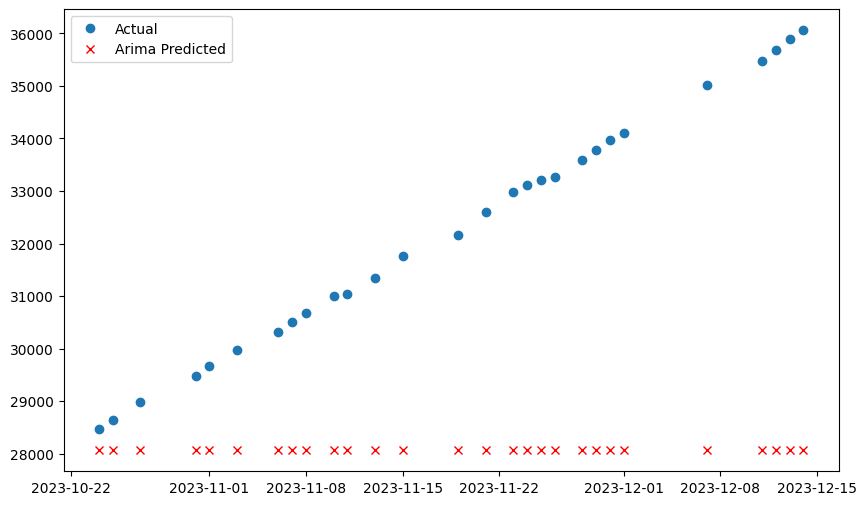

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1393.472
Date:                 Wed, 29 Jan 2025   AIC                           2790.944
Time:                         10:55:59   BIC                           2796.327
Sample:                              0   HQIC                          2793.127
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0545      0.078     -0.700      0.484      -0.207       0.098
sigma2      7.511e+09   3.54e-11   2.12e+20      0.000    7.51e+09    7.51e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

MAE for autoArima: 14459.812456511008
MSE for autoArima: 237711313.65402603
RMSE for autoArima: 15417.889403353043
MAPE for autoArima: nan%
NMSEfor autoArima: 84.01150150658292

MAE for ARIMA: 3656.6967178220375
MSE for ARIMA: 16200906.638275664
RMSE for ARIMA: 4025.0349859691487
MAPE for ARIMA: nan%
NMSE for ARIMA: 5.72569505223654


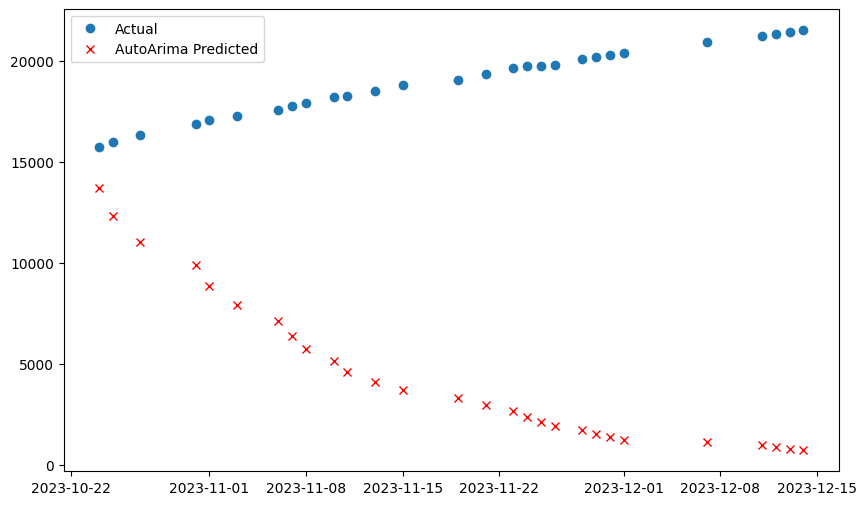

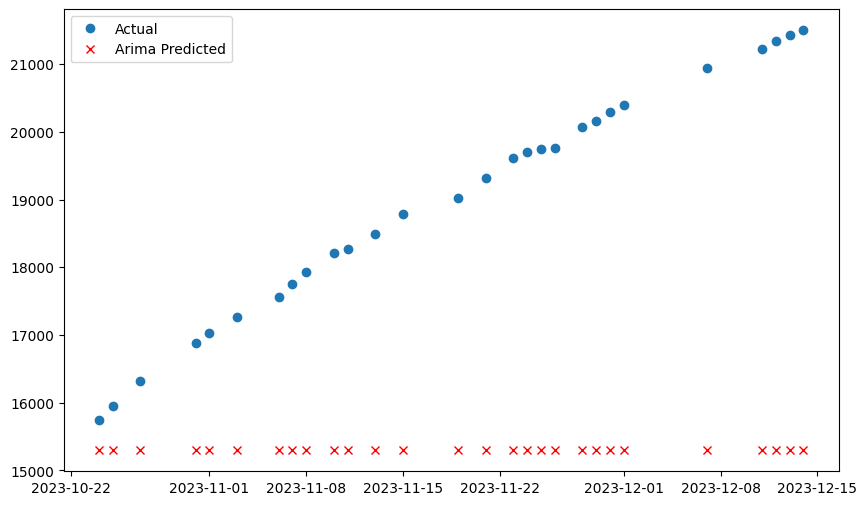

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1425.904
Date:                 Wed, 29 Jan 2025   AIC                           2855.807
Time:                         10:56:01   BIC                           2861.190
Sample:                              0   HQIC                          2857.990
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0547      0.078     -0.704      0.481      -0.207       0.097
sigma2      1.362e+10   1.94e-11   7.02e+20      0.000    1.36e+10    1.36e+10
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

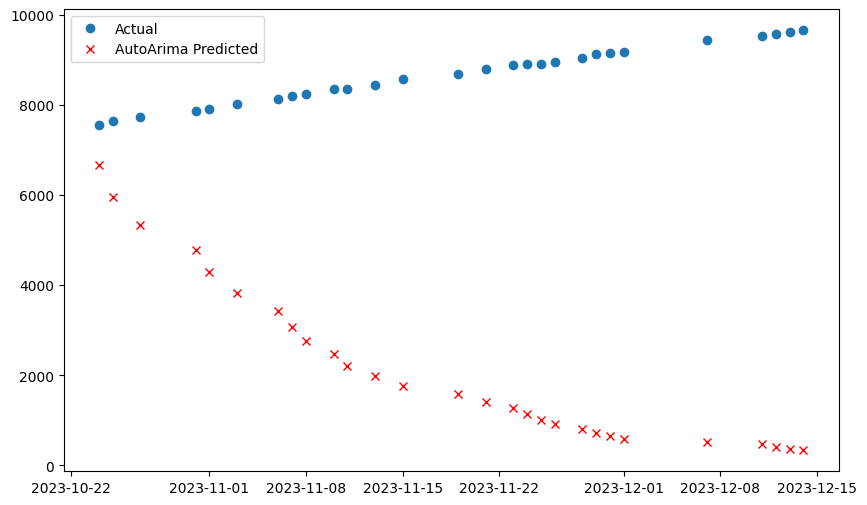

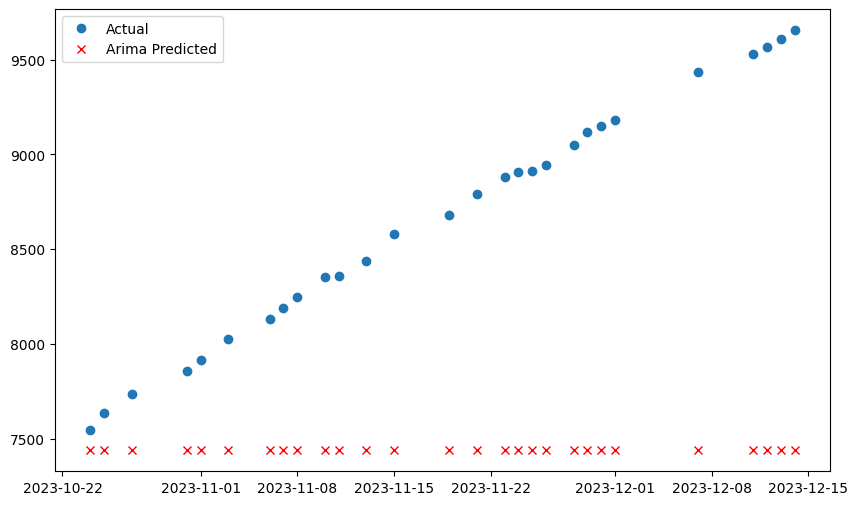

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1297.955
Date:                 Wed, 29 Jan 2025   AIC                           2599.910
Time:                         10:56:03   BIC                           2605.292
Sample:                              0   HQIC                          2602.093
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0545      0.078     -0.701      0.483      -0.207       0.098
sigma2      1.302e+09   2.04e-10   6.39e+18      0.000     1.3e+09     1.3e+09
Ljung-Box (L1) (Q):                   0.00  

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsm

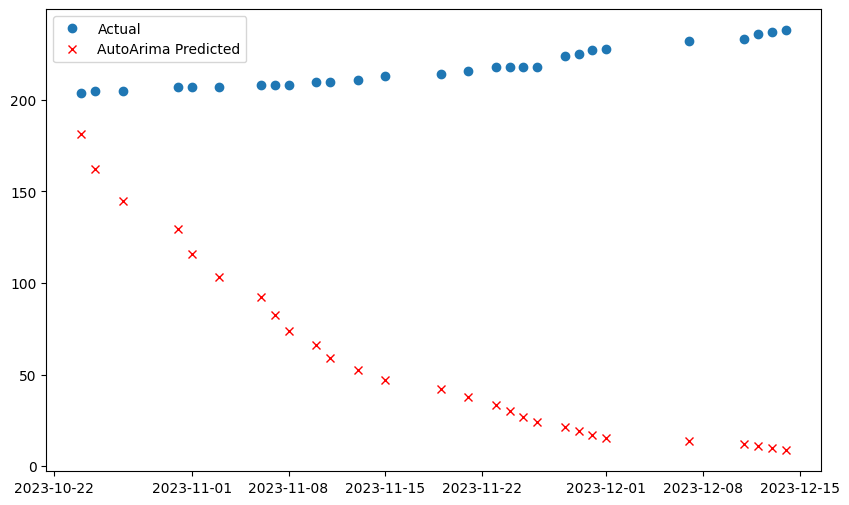

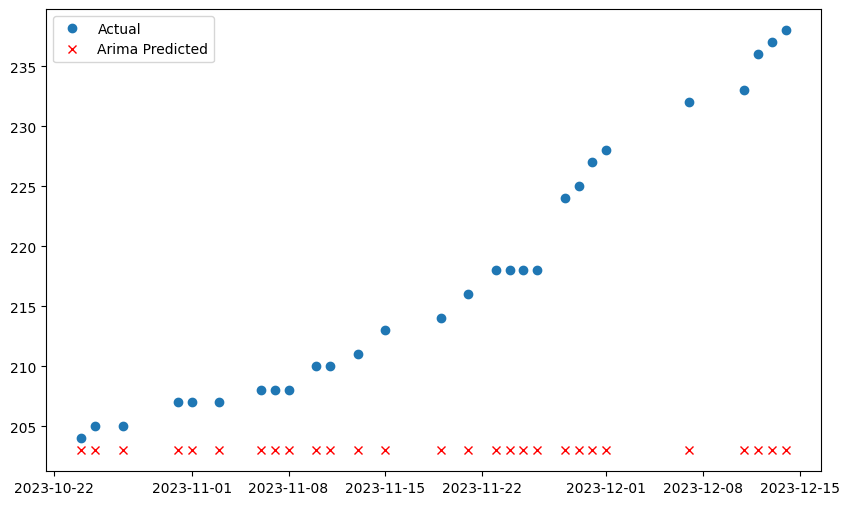

                                SARIMAX Results                                
Dep. Variable:     AATotalAPS_Ingresos   No. Observations:                  110
Model:                  ARIMA(1, 1, 0)   Log Likelihood               -1059.142
Date:                 Wed, 29 Jan 2025   AIC                           2122.283
Time:                         10:56:05   BIC                           2127.666
Sample:                              0   HQIC                          2124.466
                                 - 110                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0547      0.173     -0.317      0.752      -0.394       0.284
sigma2      1.627e+07   7.38e+05     22.055      0.000    1.48e+07    1.77e+07
Ljung-Box (L1) (Q):                   0.00  

In [28]:
evaluate_models(models, test_sets, d_from_diff, train_sets, "AATotalAPS_Ingresos")

After augmentation

In [7]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def augmented_auto_arima_train(train):
    d_from_diff = {}
    models = {}

    # provinces se asume definido fuera de la función
    # si no, define la lista de provincias en tu código principal.

    for province in provinces:
        # En vez de train[['Date', province]], solo tomamos la columna numérica
        curr_train = train[[province]].copy()

        # Usa auto_arima sobre la columna numérica
        # (Date no puede ser parte de auto_arima)
        model = pm.auto_arima(
            curr_train,
            seasonal=False,
            stepwise=True,
            suppress_warnings=True
        )
        models[province] = model

        # Check for stationarity y aplicar differencing si hace falta
        d = 0
        # Usamos adfuller sobre la serie de la provincia
        result = adfuller(curr_train[province])

        # Mientras p-value > 0.05, hacemos differencing
        while result[1] > 0.05:
            curr_train = curr_train.diff().dropna()
            d += 1
            result = adfuller(curr_train[province])
        d_from_diff[province] = d

        print(f"Best parameters for province '{province}': (d={d} from differencing, d={model.order[1]} from AutoArima)\n")

        # Crear subplots para ACF y PACF (sobre la serie ya diferenciada)
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        plot_acf(curr_train[province], ax=axes[0])
        plot_pacf(curr_train[province], ax=axes[1])
        axes[0].set_title(f'ACF for {province} (MA={model.order[2]})')
        axes[1].set_title(f'PACF for {province} (AR={model.order[0]})')
        plt.tight_layout()
        plt.show()

    return models, d_from_diff

def augmented_evaluate_model(models, d_from_diff, train, test):
    for province in models.keys():
        auto_model = models[province]

        # En vez de test['Date', province], solo tomamos la serie numérica
        curr_test = test[[province]].copy()
        curr_train = train[[province]].copy()

        # Pronóstico con el modelo auto_arima
        auto_predictions = auto_model.predict(n_periods=len(curr_test))
        d = d_from_diff[province]

        # Ajuste con ARIMA explícito, usando la misma serie de entrenamiento
        # y aplicando el grado de diferenciación hallado manualmente (d)
        model = ARIMA(curr_train, order=(auto_model.order[0], d, auto_model.order[2]))
        model_fit = model.fit()

        # Pronóstico con el ARIMA
        predictions = model_fit.forecast(steps=len(curr_test))

        print(f'AutoArima Predictions for {province} (order={auto_model.order}, d manual={d}):')
        print(auto_predictions)
        print()
        print(f'ARIMA Predictions for {province} (order=({auto_model.order[0]},{d},{auto_model.order[2]})):')
        print(predictions)
        print()

        # Calcular métricas de evaluación para auto_arima
        auto_mae = mean_absolute_error(curr_test, auto_predictions)
        auto_mse = mean_squared_error(curr_test, auto_predictions)
        auto_rmse = np.sqrt(auto_mse)
        auto_mape = np.mean(np.abs((curr_test[province] - auto_predictions) / curr_test[province])) * 100
        auto_nmse = auto_mse / np.var(curr_test[province])

        # Calcular métricas de evaluación para ARIMA
        mae = mean_absolute_error(curr_test, predictions)
        mse = mean_squared_error(curr_test, predictions)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((curr_test[province] - predictions) / curr_test[province])) * 100
        nmse = mse / np.var(curr_test[province])

        print(f'MAE for autoArima: {auto_mae}')
        print(f'MSE for autoArima: {auto_mse}')
        print(f'RMSE for autoArima: {auto_rmse}')
        print(f'MAPE for autoArima: {auto_mape}%')
        print(f'NMSE for autoArima: {auto_nmse}')
        print()
        print(f'MAE for ARIMA: {mae}')
        print(f'MSE for ARIMA: {mse}')
        print(f'RMSE for ARIMA: {rmse}')
        print(f'MAPE for ARIMA: {mape}%')
        print(f'NMSE for ARIMA: {nmse}')
        print()

        # Plot actual vs predicted (AutoArima)
        plt.figure(figsize=(10, 6))
        plt.plot(curr_test.index, curr_test[province], 'o', label='Actual')  # valores reales
        plt.plot(curr_test.index, auto_predictions, 'x', label='AutoArima Predicted', color='red')
        plt.legend()
        plt.show()

        # Plot actual vs predicted (ARIMA manual)
        plt.figure(figsize=(10, 6))
        plt.plot(curr_test.index, curr_test[province], 'o', label='Actual')
        plt.plot(curr_test.index, predictions, 'x', label='Arima Predicted', color='red')
        plt.legend()
        plt.show()

        print(model_fit.summary())


In [8]:
curr_train = pd.read_csv(
    'data/Anexos_7/training/total_incomes_augmented_training_data.csv',
    parse_dates=['Date']  # esto convierte la columna Date a tipo datetime directamente
)
curr_test = pd.read_csv(
    'data/Anexos_7/test/total_incomes_test_data.csv',
    parse_dates=['Date']
)

# # Convert the 'Date' column to datetime format
curr_train['Date'] = pd.to_datetime(curr_train['Date'], format='%Y-%m-%d')
curr_test['Date'] = pd.to_datetime(curr_test['Date'], format='%Y-%m-%d')


# curr_test.set_index('Date', inplace=True)
# curr_train.set_index('Date', inplace=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Pinar del Rio': (d=1 from differencing, d=1 from AutoArima)



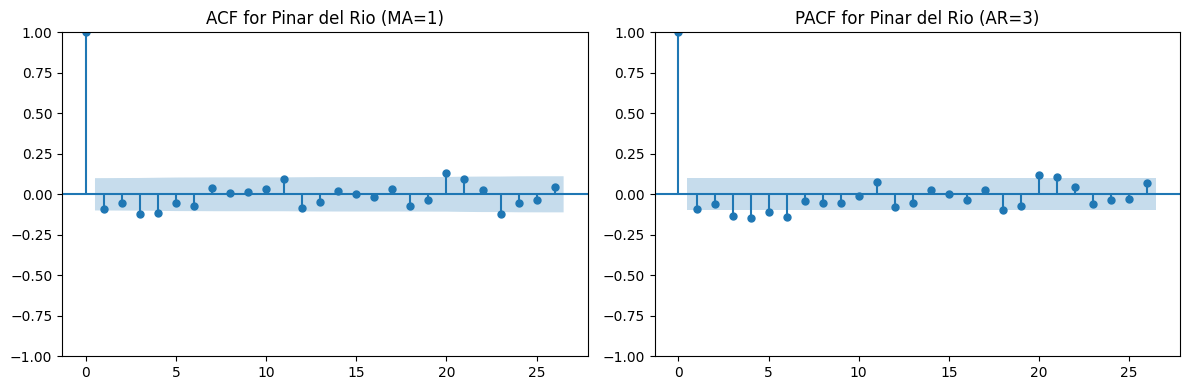

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Artemisa': (d=0 from differencing, d=1 from AutoArima)



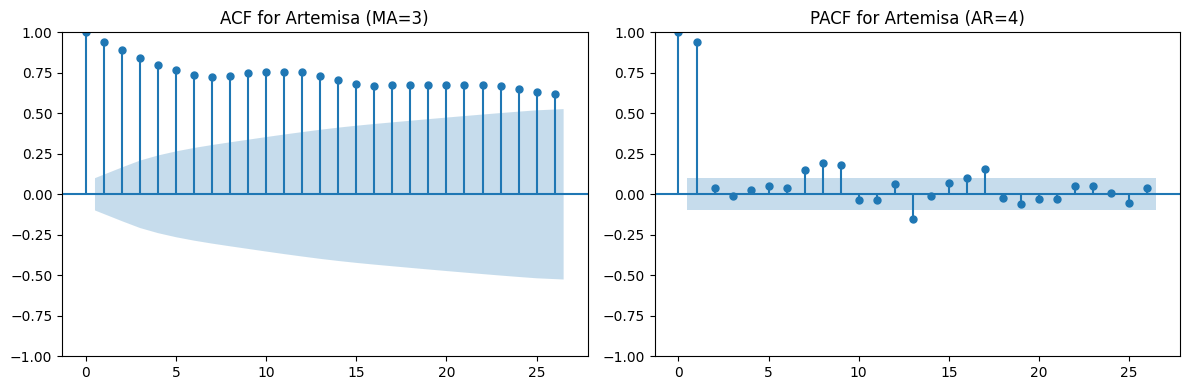

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'La Habana': (d=0 from differencing, d=1 from AutoArima)



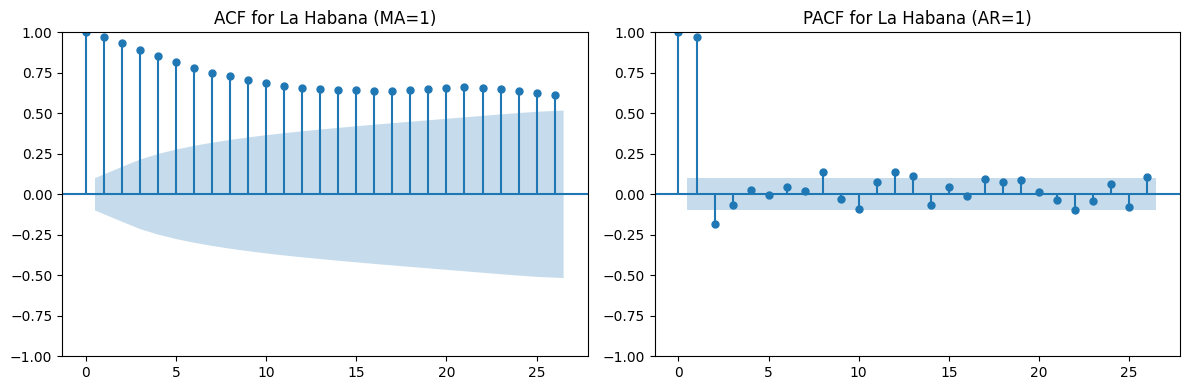

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Mayabeque': (d=0 from differencing, d=1 from AutoArima)



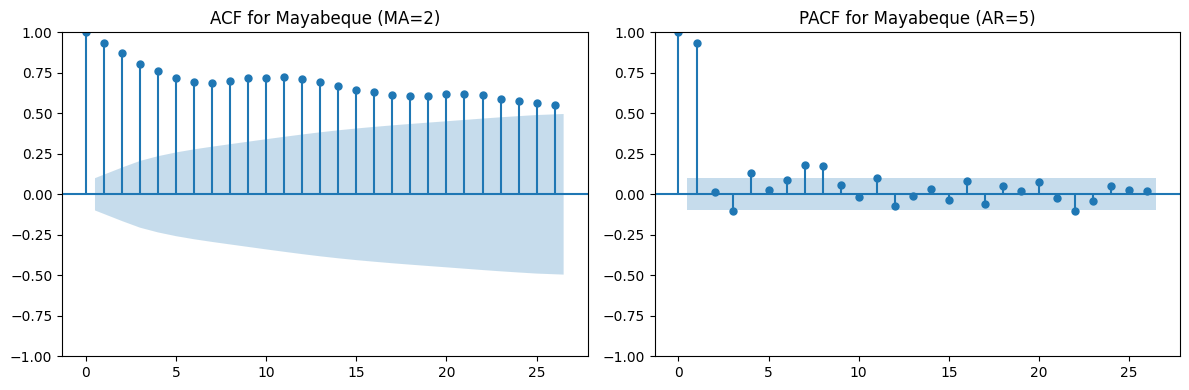

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Matanzas': (d=0 from differencing, d=1 from AutoArima)



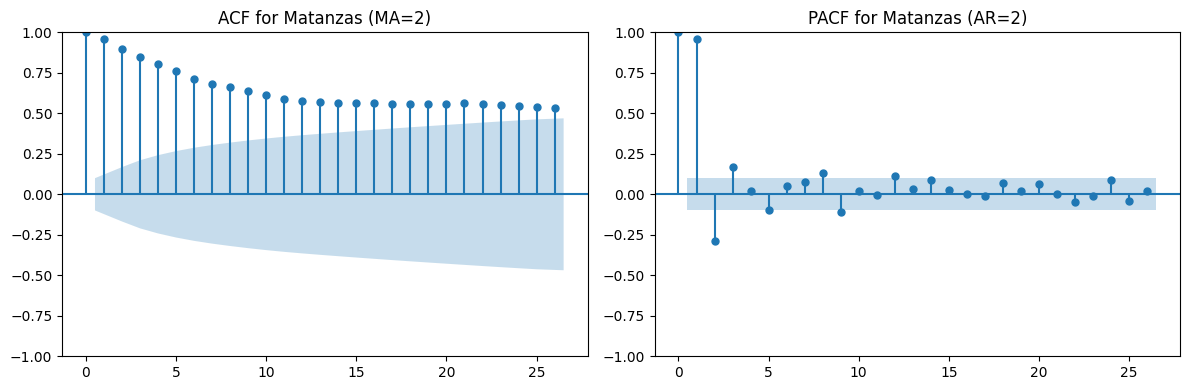

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Villa Clara': (d=1 from differencing, d=1 from AutoArima)



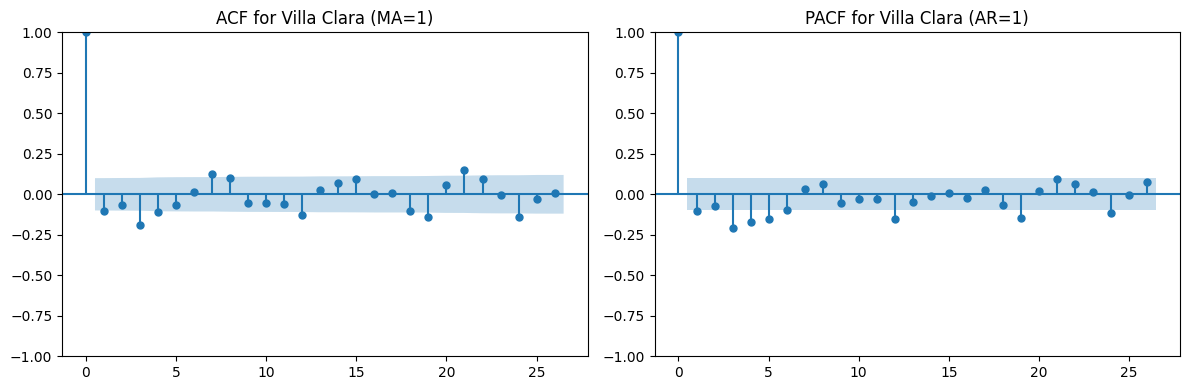

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Cienfuegos': (d=1 from differencing, d=1 from AutoArima)



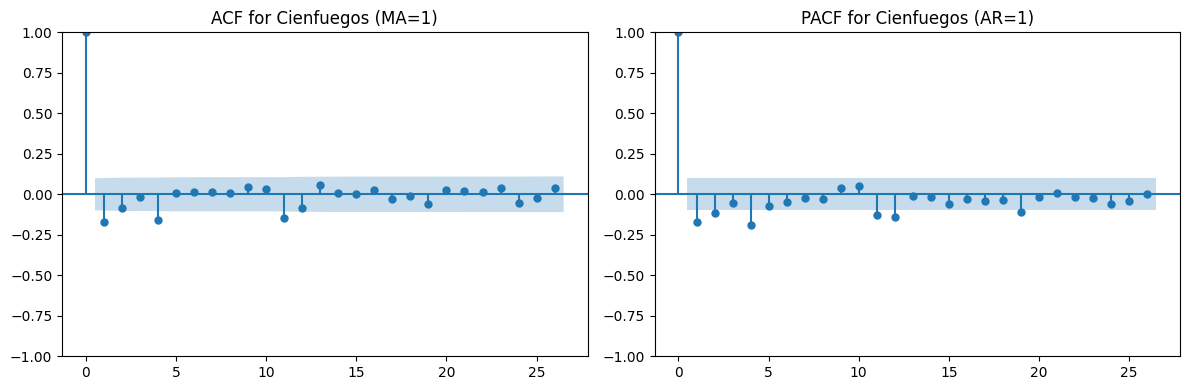

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Sancti Spiritus': (d=0 from differencing, d=1 from AutoArima)



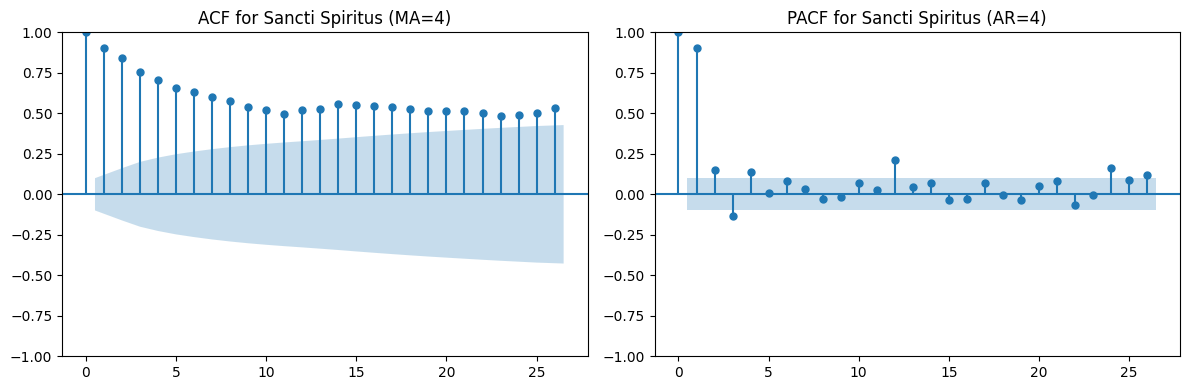

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Ciego de Ávila': (d=1 from differencing, d=1 from AutoArima)



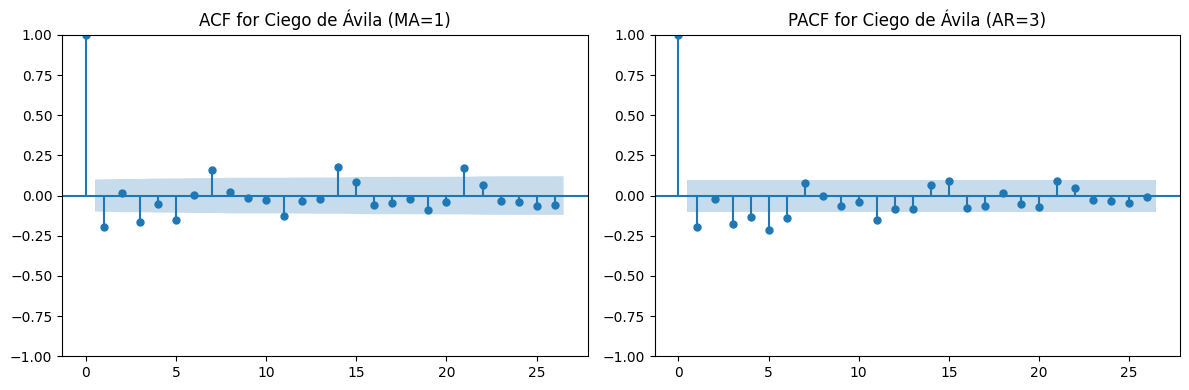

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Camagüey': (d=1 from differencing, d=1 from AutoArima)



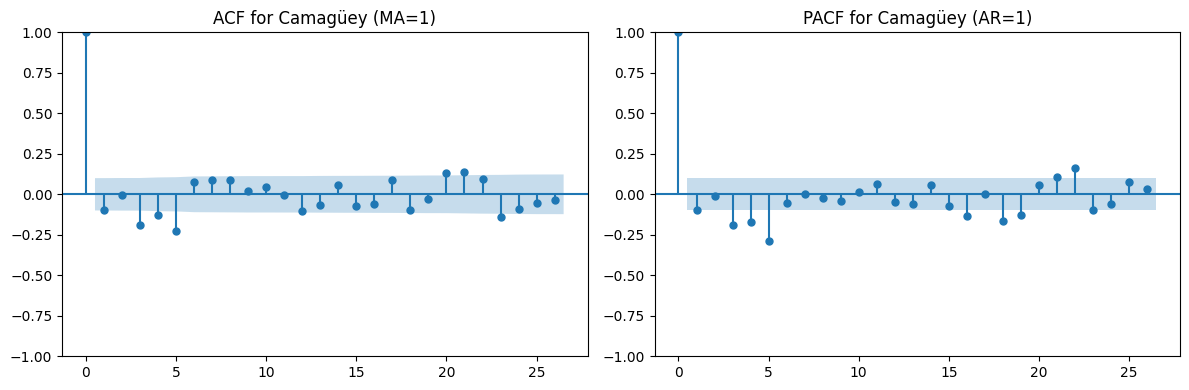

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Las Tunas': (d=1 from differencing, d=1 from AutoArima)



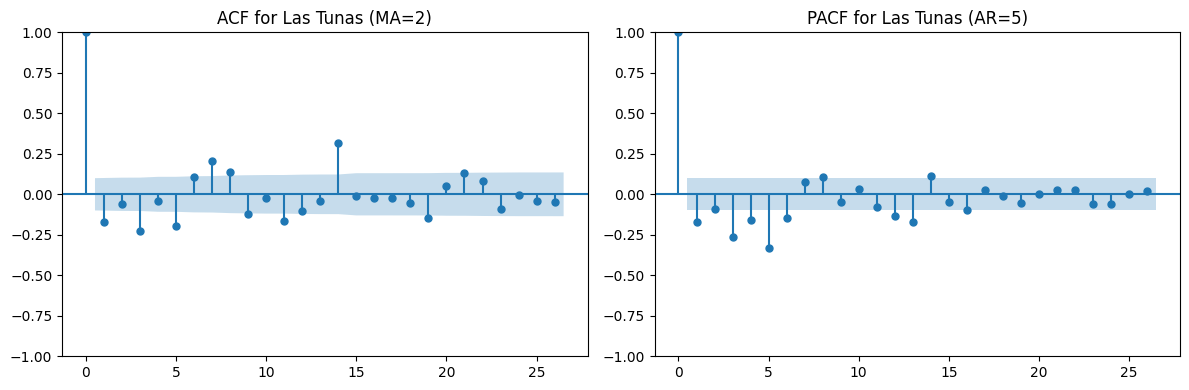

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Holguin': (d=1 from differencing, d=1 from AutoArima)



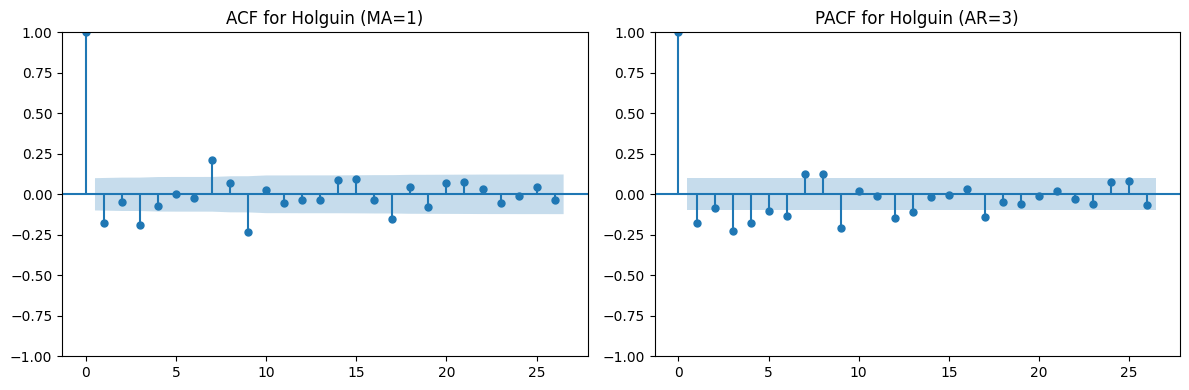

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Granma': (d=1 from differencing, d=1 from AutoArima)



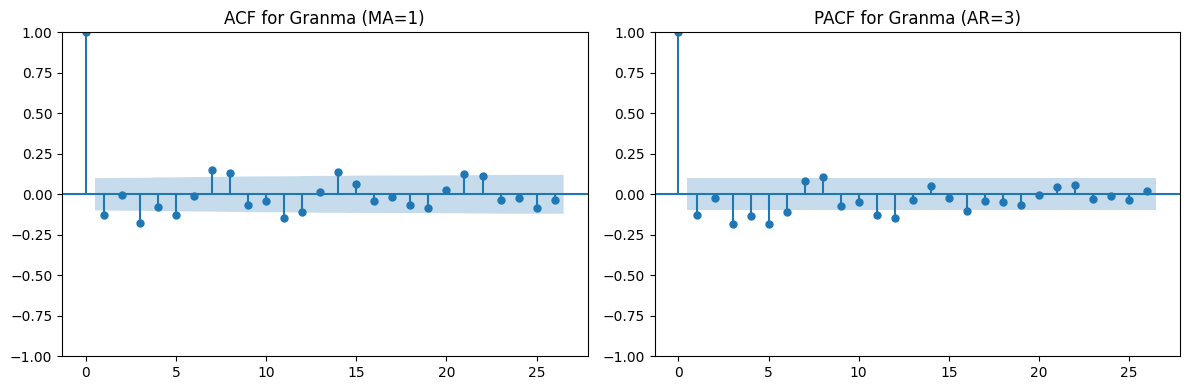

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Santiago de Cuba': (d=1 from differencing, d=1 from AutoArima)



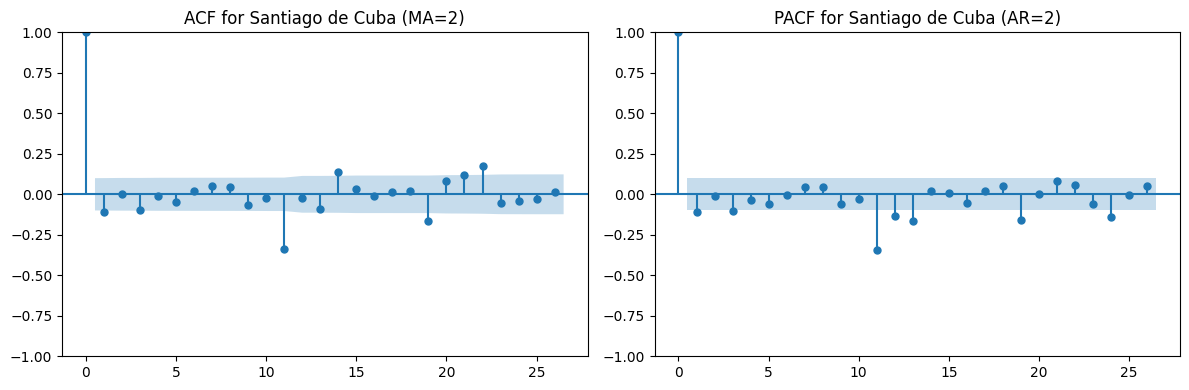

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for province 'Guantánamo': (d=0 from differencing, d=1 from AutoArima)



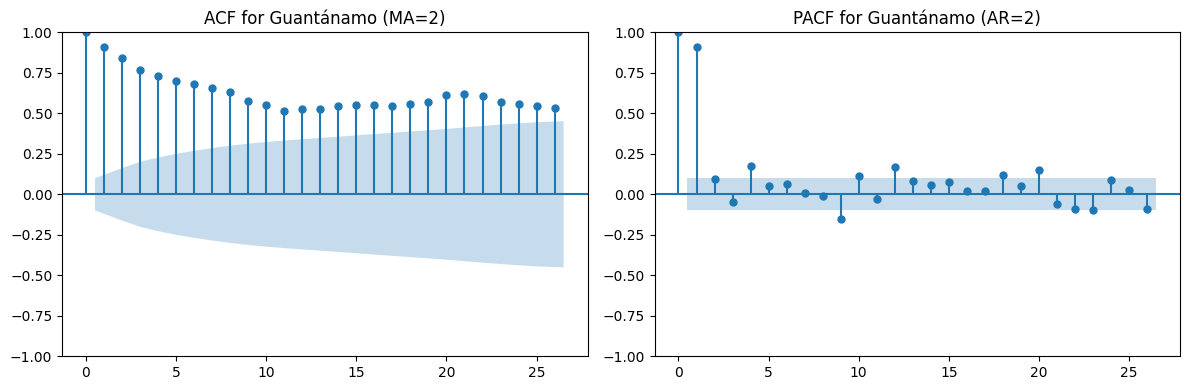

In [9]:
models, d_from_diff = augmented_auto_arima_train(curr_train)

AutoArima Predictions for Pinar del Rio (order=(3, 1, 1), d manual=1):
387    100.023797
388     98.793011
389     97.639728
390     96.909082
391     96.601421
392     96.551349
393     96.611018
394     96.687144
395     96.741461
396     96.768299
397     96.775731
398     96.773635
399     96.768959
400     96.765077
401     96.762888
402     96.762091
403     96.762073
404     96.762334
405     96.762599
406     96.762769
407     96.762843
408     96.762857
409     96.762845
410     96.762828
411     96.762815
412     96.762809
413     96.762807
414     96.762807
415     96.762808
416     96.762809
417     96.762810
418     96.762810
419     96.762810
420     96.762810
dtype: float64

ARIMA Predictions for Pinar del Rio (order=(3,1,1)):
387    100.023797
388     98.793011
389     97.639728
390     96.909082
391     96.601421
392     96.551349
393     96.611018
394     96.687144
395     96.741461
396     96.768299
397     96.775731
398     96.773635
399     96.768959
400     96.765

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


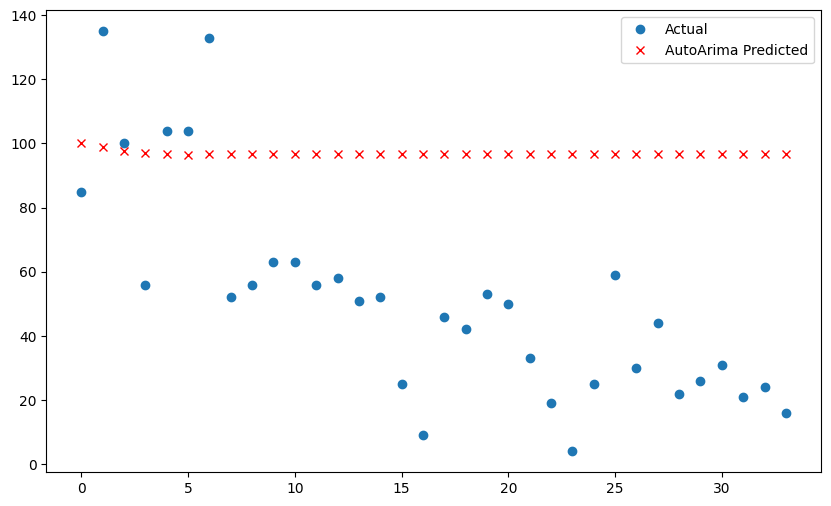

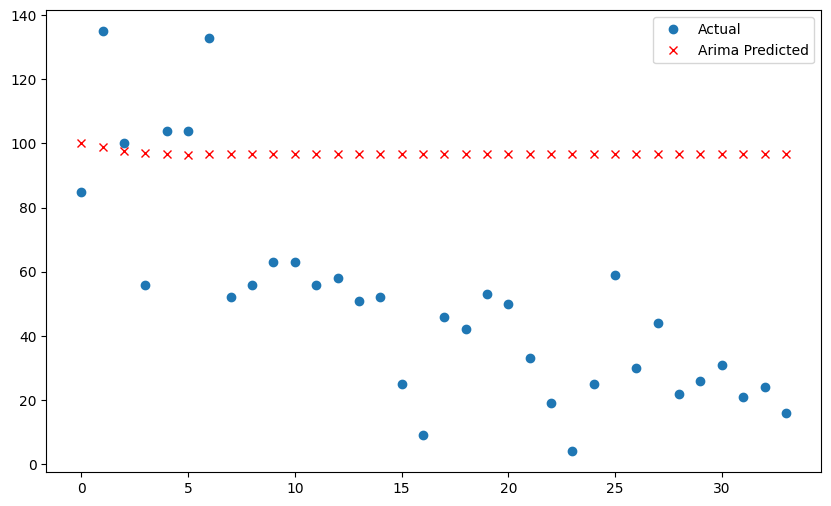

                               SARIMAX Results                                
Dep. Variable:          Pinar del Rio   No. Observations:                  387
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1819.364
Date:                Wed, 29 Jan 2025   AIC                           3648.729
Time:                        23:43:48   BIC                           3668.508
Sample:                             0   HQIC                          3656.573
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6380      0.067      9.550      0.000       0.507       0.769
ar.L2         -0.0065      0.049     -0.133      0.894      -0.103       0.090
ar.L3         -0.1226      0.042     -2.889      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AutoArima Predictions for Artemisa (order=(4, 1, 3), d manual=0):
387    18.812080
388    18.865575
389    19.346890
390    25.570320
391    21.909712
392    26.171417
393    25.104821
394    23.241640
395    26.739810
396    21.882429
397    24.851671
398    23.272087
399    21.334016
400    24.330341
401    19.817620
402    22.504768
403    20.971732
404    19.222027
405    21.884606
406    17.735415
407    20.176648
408    18.692149
409    17.106467
410    19.463609
411    15.643627
412    17.855687
413    16.418934
414    14.978074
415    17.058739
416    13.539207
417    15.539447
418    14.150339
419    12.837700
420    14.668412
dtype: float64

ARIMA Predictions for Artemisa (order=(4,0,3)):
387    19.662297
388    19.717856
389    19.007780
390    23.633805
391    19.931009
392    24.318497
393    23.802675
394    23.181446
395    27.415316
396    23.937995
397    27.978015
398    27.446833
399    26.844558
400    30.729239
401    27.465098
402    31.187065
403    30.647350
404

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


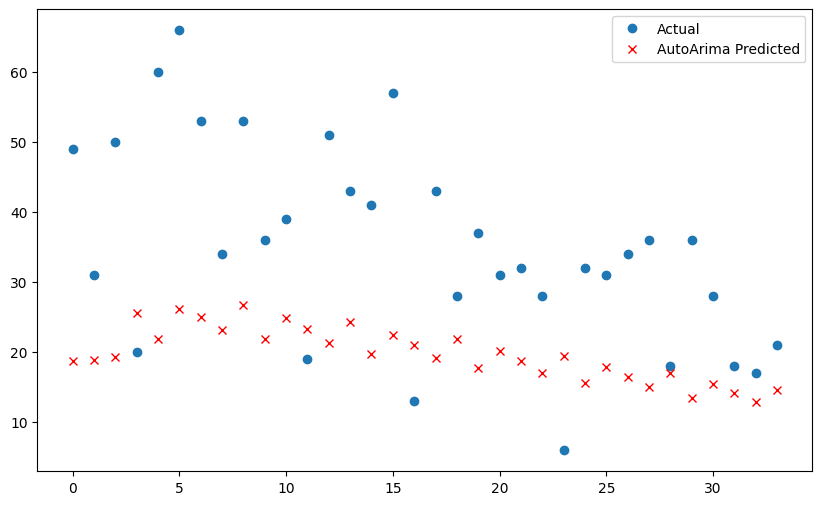

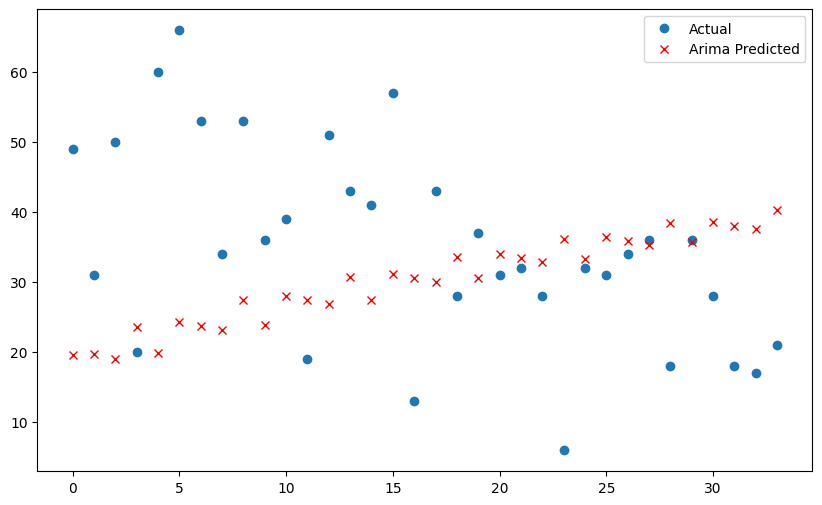

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:               Artemisa   No. Observations:                  387
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -1575.877
Date:                Wed, 29 Jan 2025   AIC                           3169.753
Time:                        23:43:48   BIC                           3205.379
Sample:                             0   HQIC                          3183.880
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.7788     35.970      1.495      0.135     -16.720     124.278
ar.L1         -0.7540      0.171     -4.403      0.000      -1.090      -0.418
ar.L2          0.5006      0.110      4.545      0.0

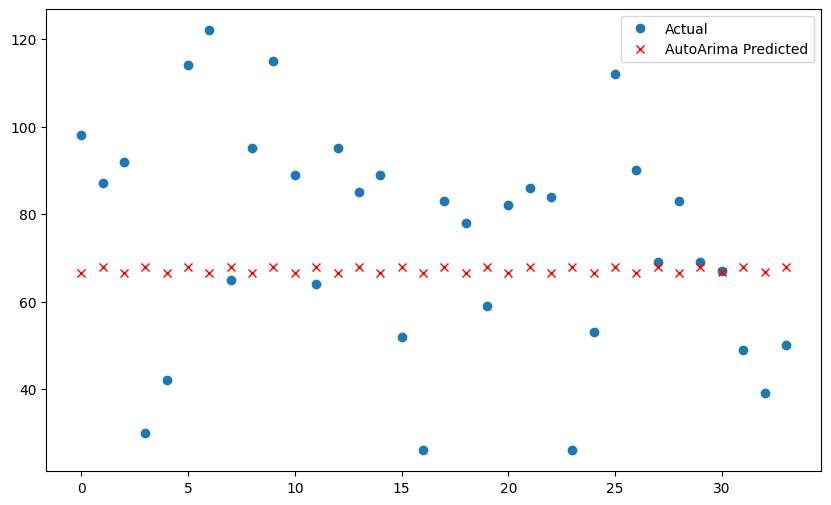

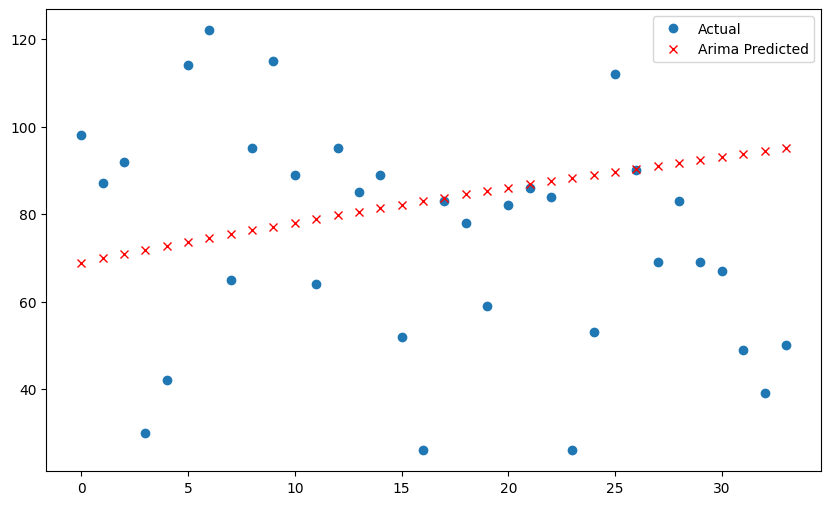

                               SARIMAX Results                                
Dep. Variable:              La Habana   No. Observations:                  387
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1839.930
Date:                Wed, 29 Jan 2025   AIC                           3687.860
Time:                        23:43:48   BIC                           3703.694
Sample:                             0   HQIC                          3694.139
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.7850    113.118      1.289      0.197     -75.922     367.492
ar.L1          0.9875      0.006    155.040      0.000       0.975       1.000
ma.L1          0.0070      0.024      0.288      0.7

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AutoArima Predictions for Mayabeque (order=(5, 1, 2), d manual=0):
387    23.451324
388    19.396760
389    31.744563
390    15.444734
391    19.152924
392    14.618535
393    20.800293
394    15.980055
395    19.435506
396    17.960910
397    21.009889
398    18.501957
399    18.715369
400    15.972187
401    15.425733
402    13.017776
403    12.659550
404    11.760423
405    12.523024
406    12.709739
407    13.589689
408    13.578545
409    13.515933
410    12.460591
411    11.271135
412     9.634681
413     8.350298
414     7.277218
415     6.879876
416     6.863297
417     7.270042
418     7.646044
419     7.863541
420     7.601025
dtype: float64

ARIMA Predictions for Mayabeque (order=(5,0,2)):
387    21.844142
388    10.096140
389    19.369957
390    17.092938
391    24.158279
392    21.964709
393    26.050031
394    22.585321
395    25.355450
396    21.738192
397    24.542502
398    21.340554
399    24.423168
400    21.493096
401    24.633856
402    21.741858
403    24.797976
4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


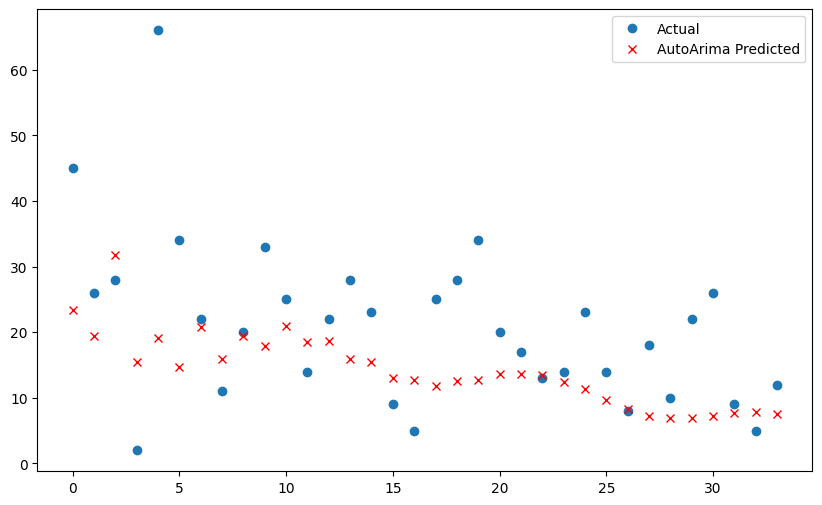

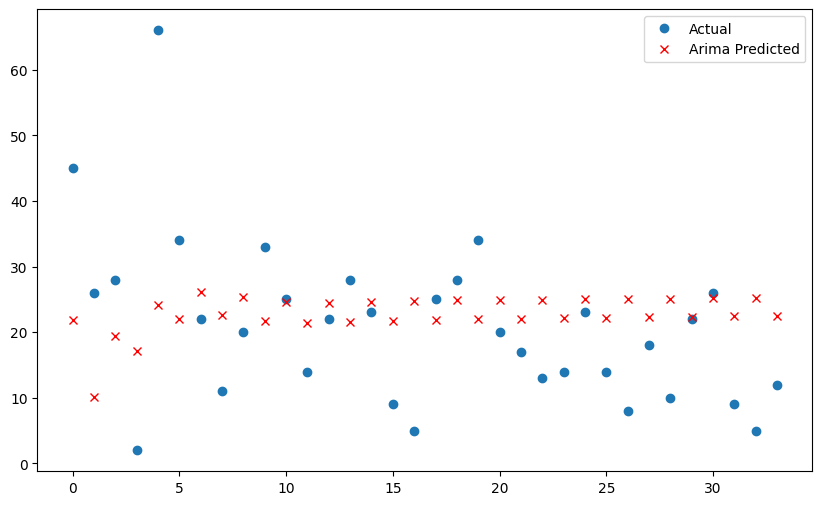

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Mayabeque   No. Observations:                  387
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1668.385
Date:                Wed, 29 Jan 2025   AIC                           3354.771
Time:                        23:43:49   BIC                           3390.397
Sample:                             0   HQIC                          3368.897
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2241     86.407      0.558      0.577    -121.130     217.578
ar.L1          0.6588      0.038     17.308      0.000       0.584       0.733
ar.L2          1.1303      0.045     24.974      0.0

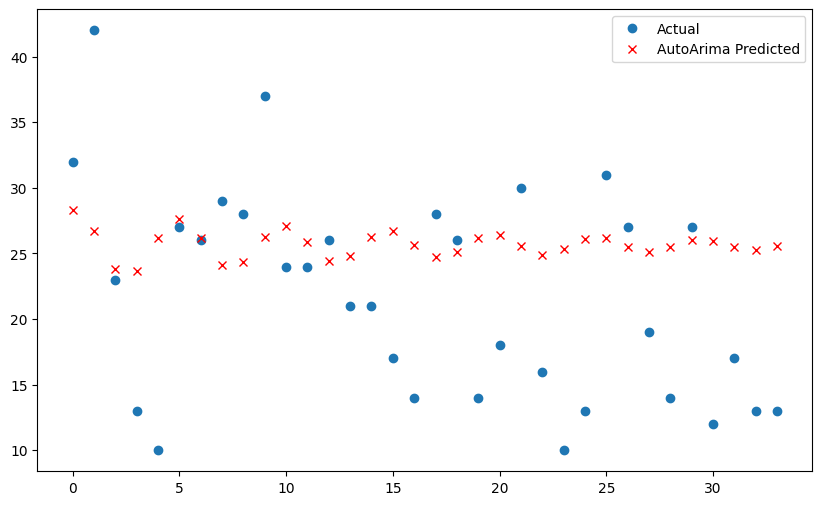

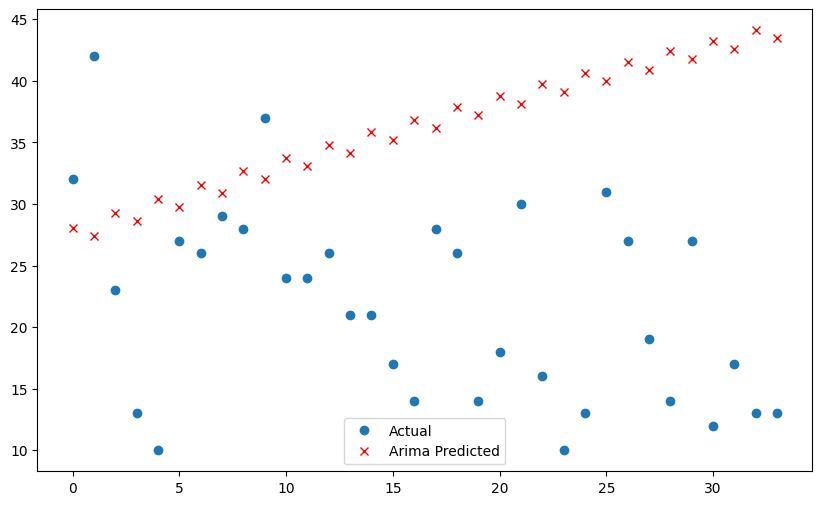

                               SARIMAX Results                                
Dep. Variable:               Matanzas   No. Observations:                  387
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1575.130
Date:                Wed, 29 Jan 2025   AIC                           3162.261
Time:                        23:43:49   BIC                           3186.011
Sample:                             0   HQIC                          3171.679
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.8561     56.128      1.387      0.165     -32.153     187.865
ar.L1         -0.0073      0.010     -0.761      0.447      -0.026       0.012
ar.L2          0.9834      0.009    108.542      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


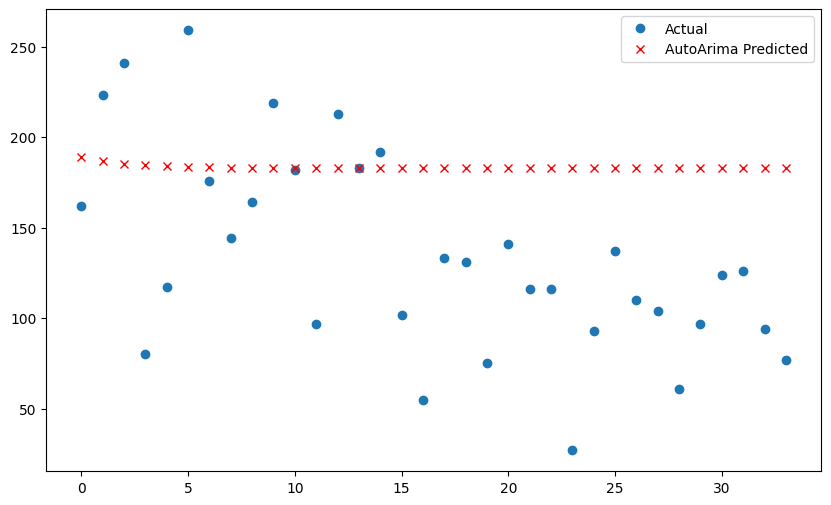

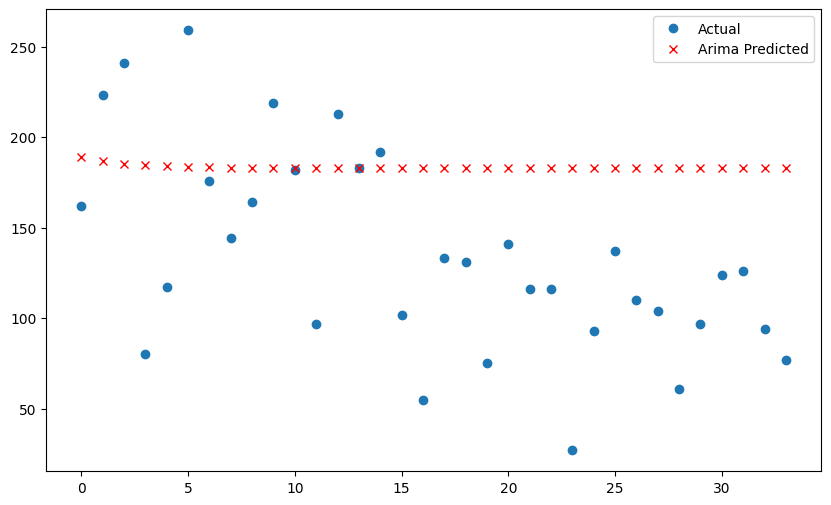

                               SARIMAX Results                                
Dep. Variable:            Villa Clara   No. Observations:                  387
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1866.337
Date:                Wed, 29 Jan 2025   AIC                           3738.674
Time:                        23:43:49   BIC                           3750.542
Sample:                             0   HQIC                          3743.380
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6541      0.038     17.319      0.000       0.580       0.728
ma.L1         -0.8888      0.033    -26.928      0.000      -0.953      -0.824
sigma2       926.2764     38.865     23.833      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


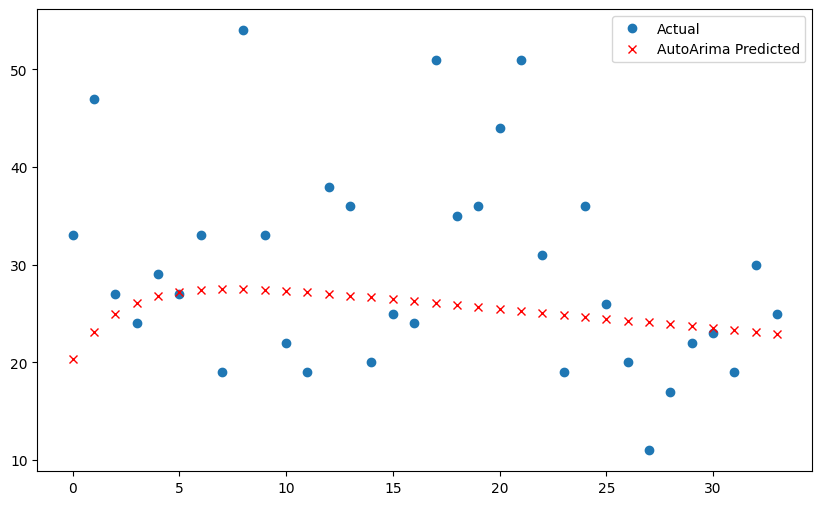

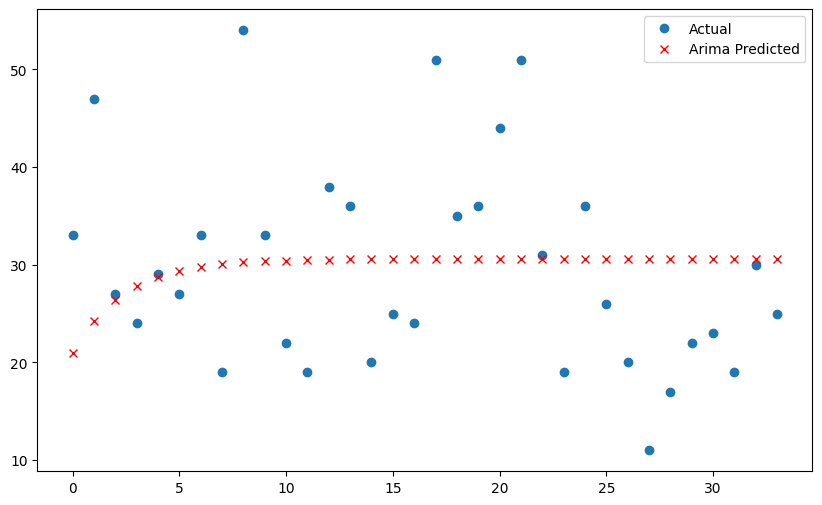

                               SARIMAX Results                                
Dep. Variable:             Cienfuegos   No. Observations:                  387
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1374.594
Date:                Wed, 29 Jan 2025   AIC                           2755.188
Time:                        23:43:49   BIC                           2767.056
Sample:                             0   HQIC                          2759.894
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6587      0.064     10.239      0.000       0.533       0.785
ma.L1         -0.8893      0.052    -17.239      0.000      -0.990      -0.788
sigma2        72.4908      2.992     24.226      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AutoArima Predictions for Sancti Spiritus (order=(4, 1, 4), d manual=0):
387    67.019892
388    89.601189
389    92.945028
390    95.090123
391    75.332385
392    67.969827
393    59.374358
394    75.015210
395    84.629828
396    99.919237
397    91.302711
398    83.514706
399    64.237669
400    65.550822
401    68.705286
402    88.907847
403    93.944933
404    97.383093
405    79.733354
406    70.858923
407    60.565532
408    72.877882
409    82.342661
410    98.193483
411    92.805622
412    86.067792
413    67.259668
414    65.725809
415    67.143703
416    85.650882
417    92.559972
418    97.765479
419    82.728938
420    73.163716
dtype: float64

ARIMA Predictions for Sancti Spiritus (order=(4,0,4)):
387    63.484235
388    85.796115
389    86.764520
390    84.427058
391    62.359317
392    54.730059
393    49.284562
394    67.325082
395    78.399359
396    91.414991
397    80.345232
398    69.860661
399    51.497405
400    54.523927
401    60.906770
402    81.348928
403   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


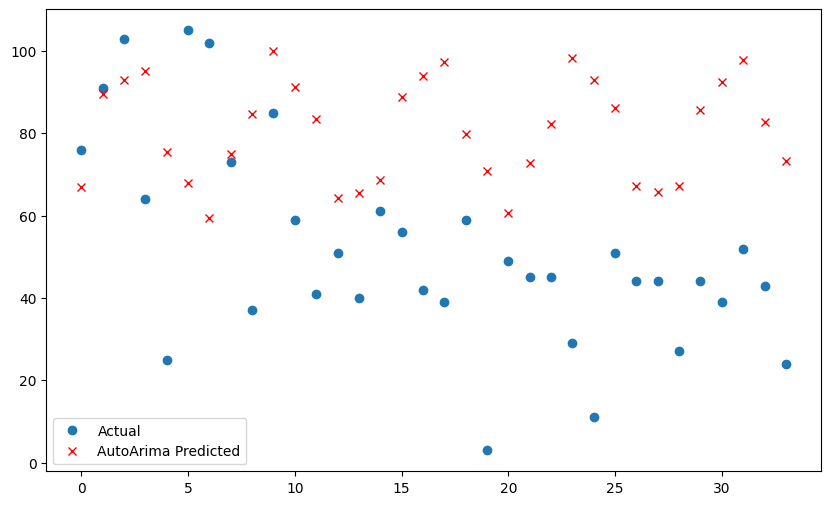

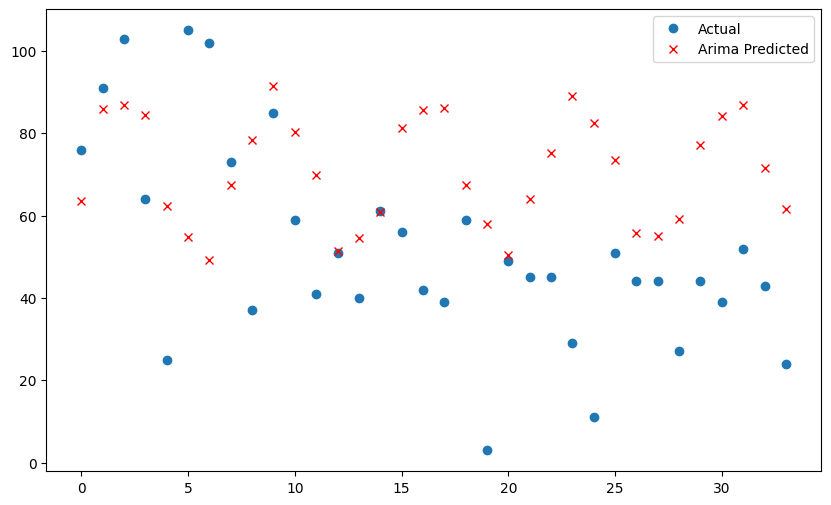

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:        Sancti Spiritus   No. Observations:                  387
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1763.305
Date:                Wed, 29 Jan 2025   AIC                           3546.610
Time:                        23:43:50   BIC                           3586.194
Sample:                             0   HQIC                          3562.306
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6172    312.587      0.248      0.804    -535.042     690.276
ar.L1          1.2745      0.016     79.452      0.000       1.243       1.306
ar.L2         -0.0213      0.027     -0.787      0.4

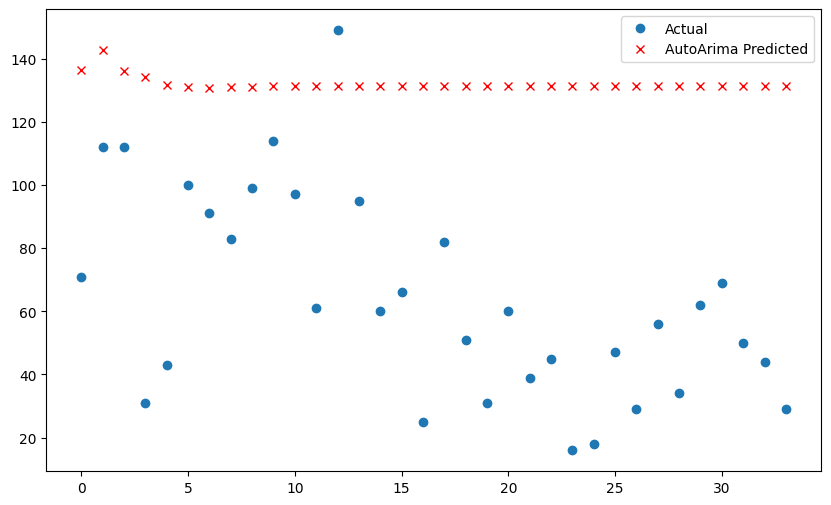

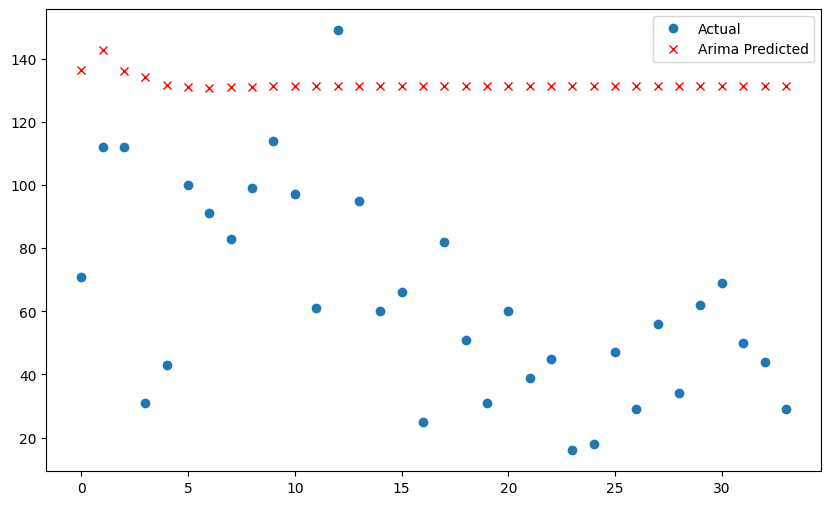

                               SARIMAX Results                                
Dep. Variable:         Ciego de Ávila   No. Observations:                  387
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1869.876
Date:                Wed, 29 Jan 2025   AIC                           3749.753
Time:                        23:43:50   BIC                           3769.532
Sample:                             0   HQIC                          3757.596
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5531      0.051     10.825      0.000       0.453       0.653
ar.L2          0.0992      0.046      2.140      0.032       0.008       0.190
ar.L3         -0.1746      0.056     -3.141      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


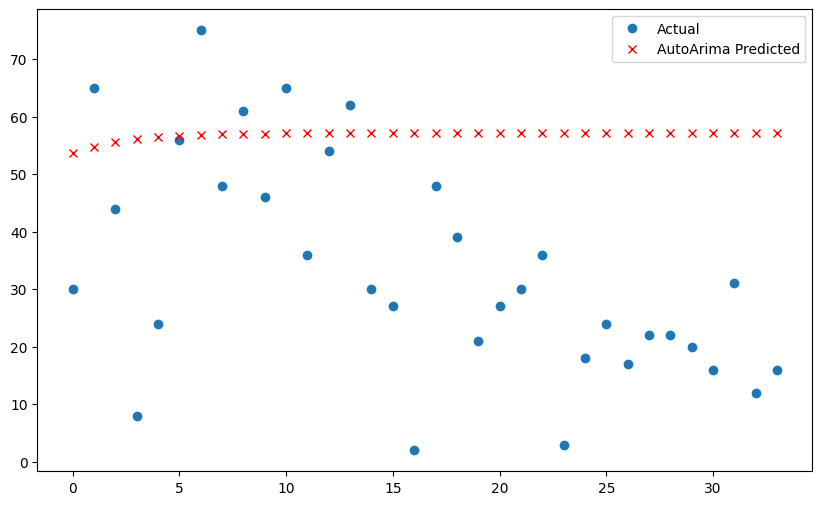

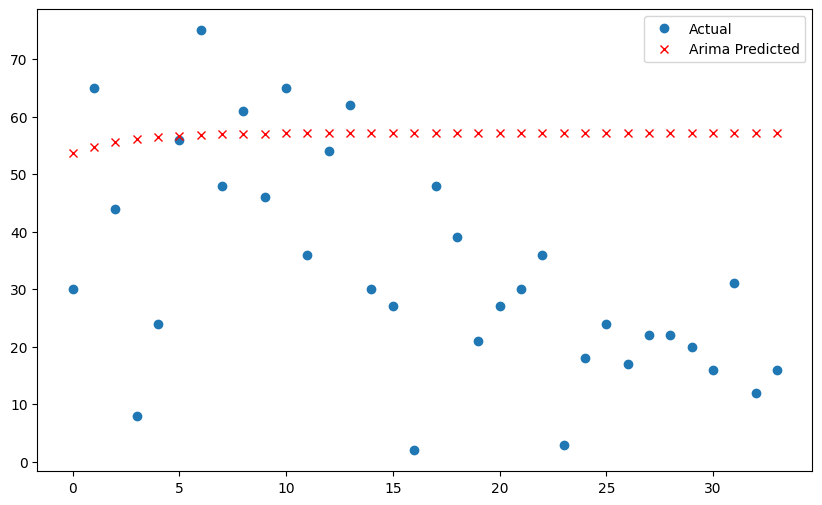

                               SARIMAX Results                                
Dep. Variable:               Camagüey   No. Observations:                  387
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1881.538
Date:                Wed, 29 Jan 2025   AIC                           3769.076
Time:                        23:43:50   BIC                           3780.944
Sample:                             0   HQIC                          3773.782
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6817      0.033     20.838      0.000       0.618       0.746
ma.L1         -0.9069      0.022    -42.150      0.000      -0.949      -0.865
sigma2      1002.0641     34.107     29.380      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AutoArima Predictions for Las Tunas (order=(5, 1, 2), d manual=1):
387    125.682506
388    133.012847
389    114.381157
390    102.504553
391     83.760086
392     83.776371
393     98.526159
394    120.320276
395    128.902446
396    120.965787
397    102.201039
398     87.044212
399     85.347067
400     98.338620
401    116.109125
402    125.868653
403    120.721964
404    104.969174
405     90.251600
406     87.099130
407     97.334585
408    113.179738
409    123.084099
410    120.158950
411    106.936847
412     93.252854
413     88.928671
414     96.739765
415    110.667483
416    120.520514
417    119.379149
418    108.441650
419     95.884326
420     90.761914
dtype: float64

ARIMA Predictions for Las Tunas (order=(5,1,2)):
387    125.682506
388    133.012847
389    114.381157
390    102.504553
391     83.760086
392     83.776371
393     98.526159
394    120.320276
395    128.902446
396    120.965787
397    102.201039
398     87.044212
399     85.347067
400     98.338620
401 

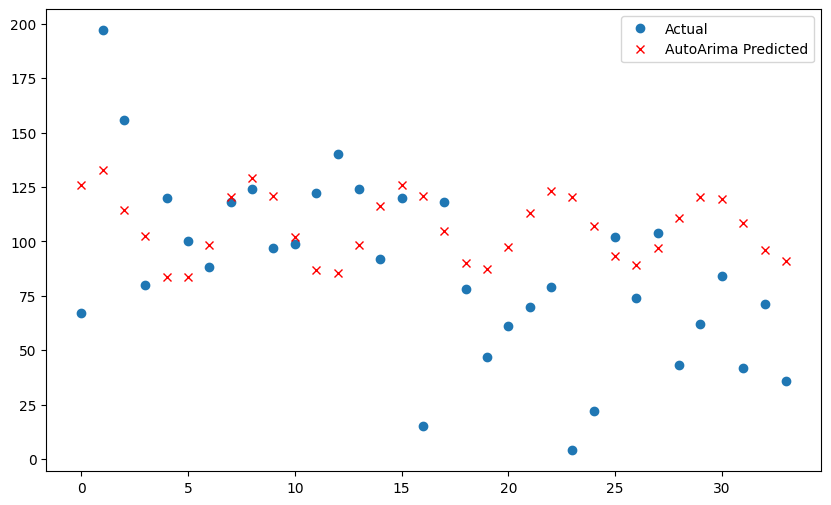

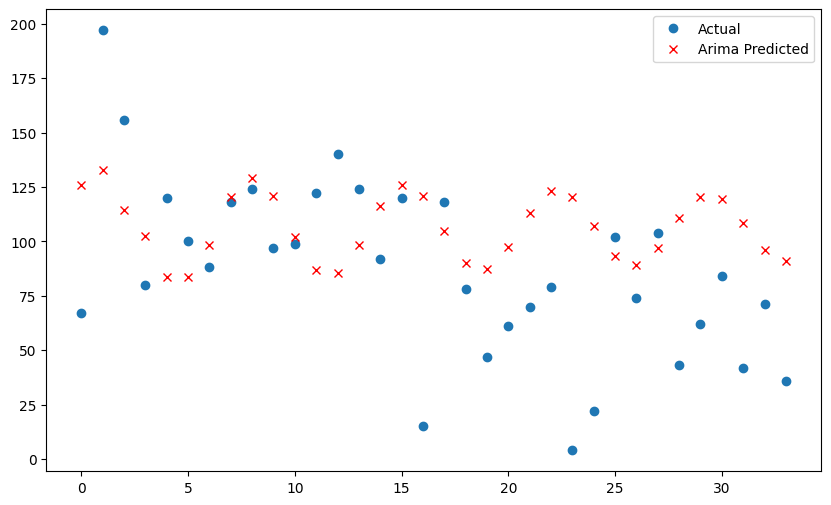

                               SARIMAX Results                                
Dep. Variable:              Las Tunas   No. Observations:                  387
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1594.490
Date:                Wed, 29 Jan 2025   AIC                           3204.981
Time:                        23:43:51   BIC                           3236.627
Sample:                             0   HQIC                          3217.531
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5778      0.076      7.626      0.000       0.429       0.726
ar.L2         -0.6024      0.050    -11.941      0.000      -0.701      -0.504
ar.L3         -0.3657      0.046     -7.917      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


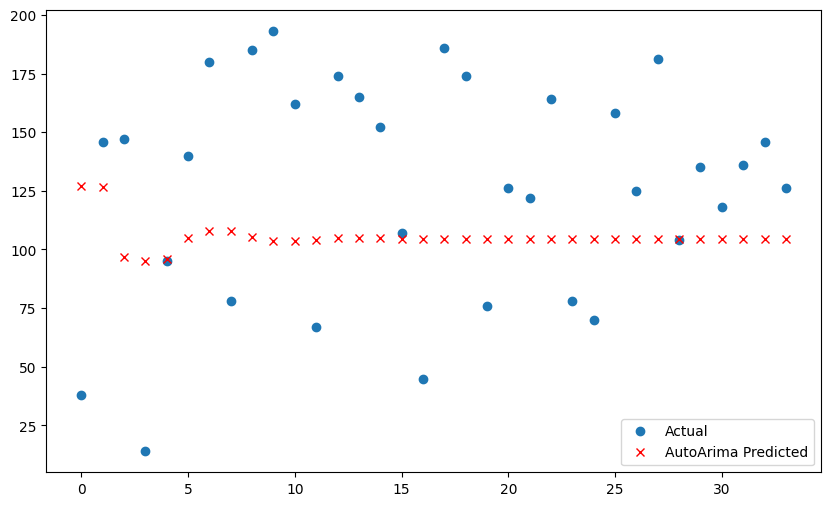

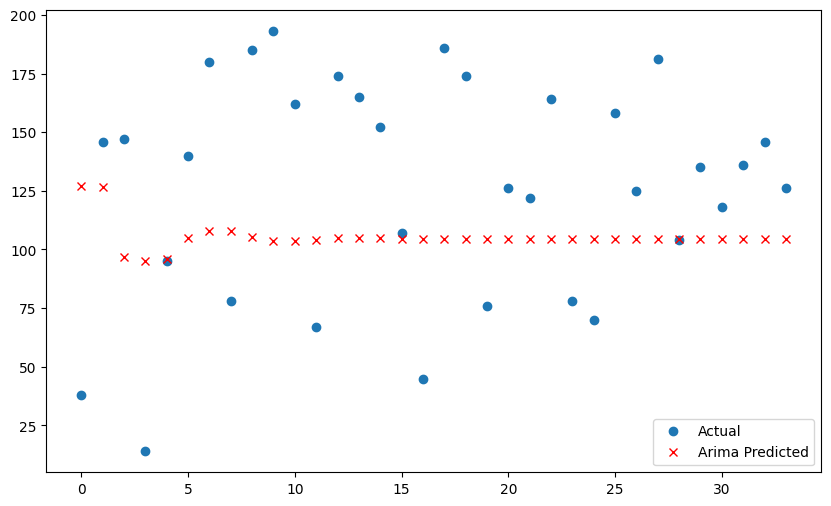

                               SARIMAX Results                                
Dep. Variable:                Holguin   No. Observations:                  387
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1702.844
Date:                Wed, 29 Jan 2025   AIC                           3415.687
Time:                        23:43:51   BIC                           3435.466
Sample:                             0   HQIC                          3423.531
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2793      0.070      4.016      0.000       0.143       0.416
ar.L2         -0.0457      0.032     -1.415      0.157      -0.109       0.018
ar.L3         -0.2841      0.041     -6.903      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


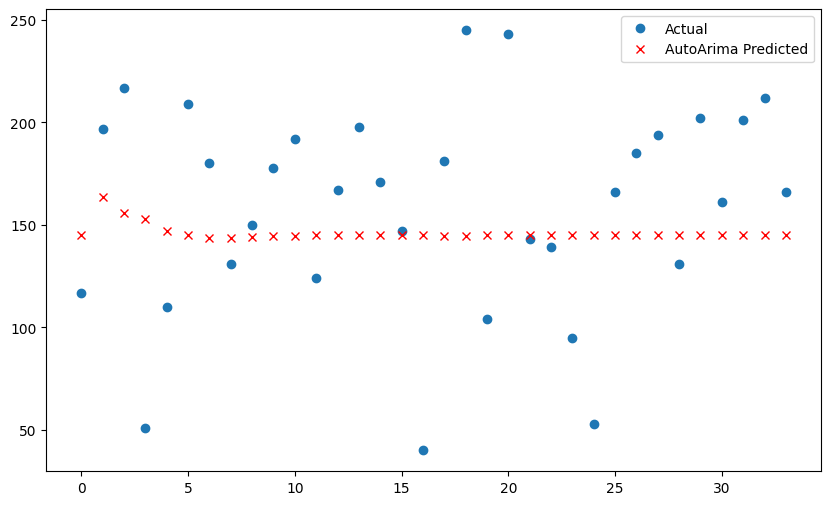

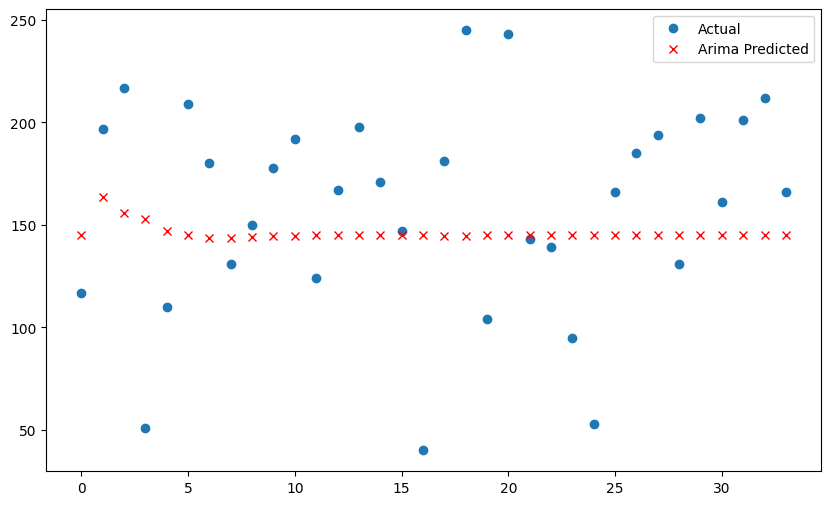

                               SARIMAX Results                                
Dep. Variable:                 Granma   No. Observations:                  387
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1851.110
Date:                Wed, 29 Jan 2025   AIC                           3712.221
Time:                        23:43:51   BIC                           3732.000
Sample:                             0   HQIC                          3720.065
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6278      0.053     11.944      0.000       0.525       0.731
ar.L2          0.0675      0.055      1.235      0.217      -0.040       0.175
ar.L3         -0.1782      0.046     -3.847      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


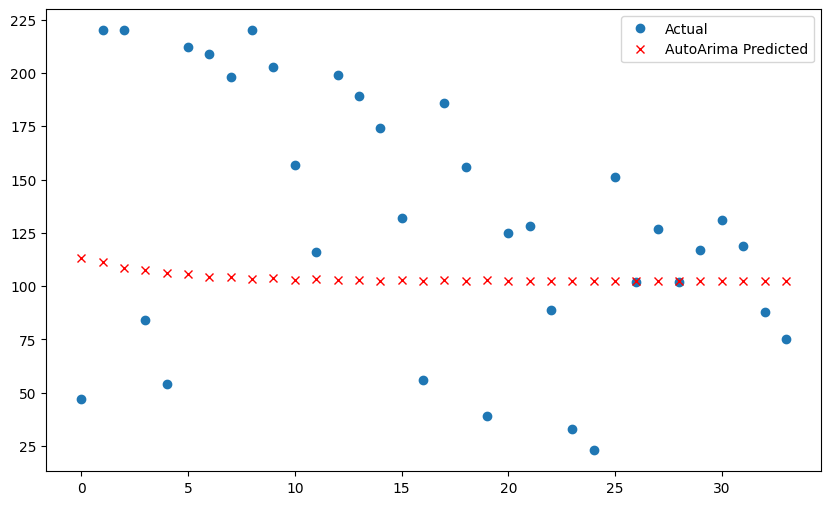

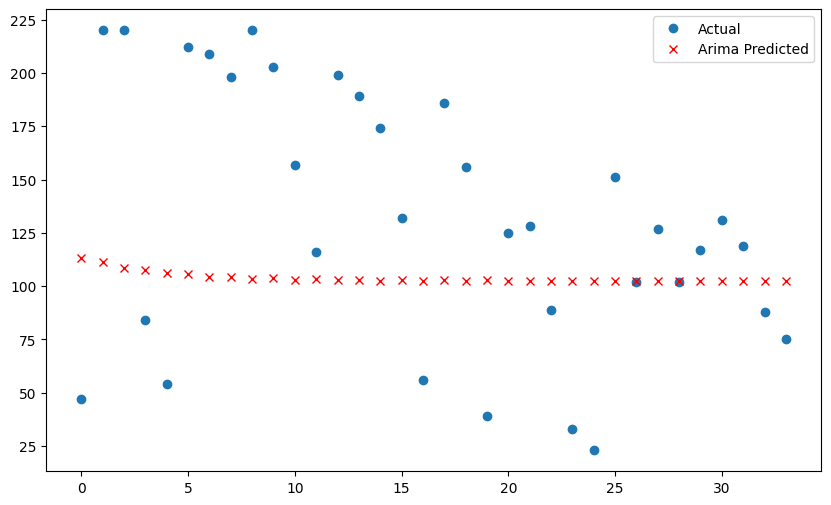

                               SARIMAX Results                                
Dep. Variable:       Santiago de Cuba   No. Observations:                  387
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2031.584
Date:                Wed, 29 Jan 2025   AIC                           4073.167
Time:                        23:43:51   BIC                           4092.946
Sample:                             0   HQIC                          4081.011
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2252      0.039     -5.807      0.000      -0.301      -0.149
ar.L2          0.7673      0.037     20.851      0.000       0.695       0.839
ma.L1          0.0224      0.044      0.505      0.6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AutoArima Predictions for Guantánamo (order=(2, 1, 2), d manual=0):
387    36.487332
388    31.939753
389    37.092749
390    32.404729
391    37.369694
392    32.641611
393    37.489087
394    32.768834
395    37.532988
396    32.843262
397    37.540790
398    32.892197
399    37.531406
400    32.928749
401    37.513915
402    32.959212
403    37.492673
404    32.986612
405    37.469771
406    33.012401
407    37.446211
408    33.037279
409    37.422471
410    33.061582
411    37.398782
412    33.085475
413    37.375251
414    33.109037
415    37.351929
416    33.132309
417    37.328838
418    33.155310
419    37.305988
420    33.178052
dtype: float64

ARIMA Predictions for Guantánamo (order=(2,0,2)):
387    37.671982
388    33.140240
389    38.349190
390    33.828456
391    38.944380
392    34.439031
393    39.467173
394    34.981013
395    39.926062
396    35.462390
397    40.328551
398    35.890218
399    40.681263
400    36.270729
401    40.990049
402    36.609425
403    41.260072

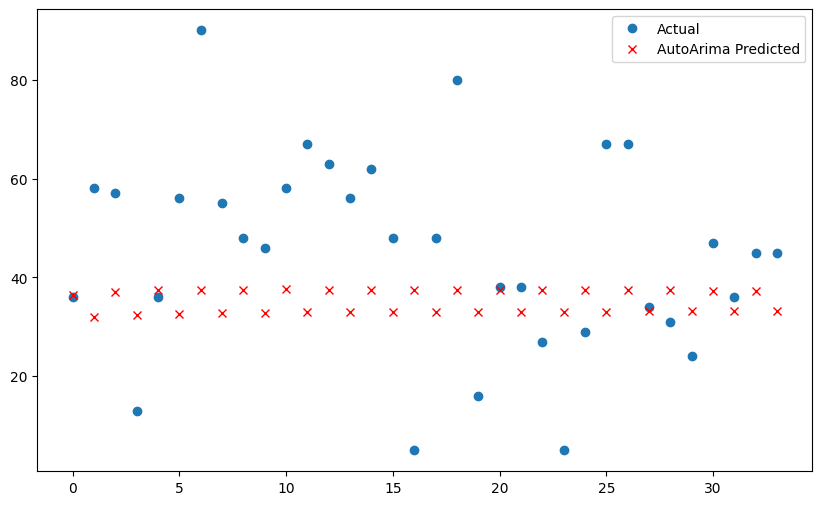

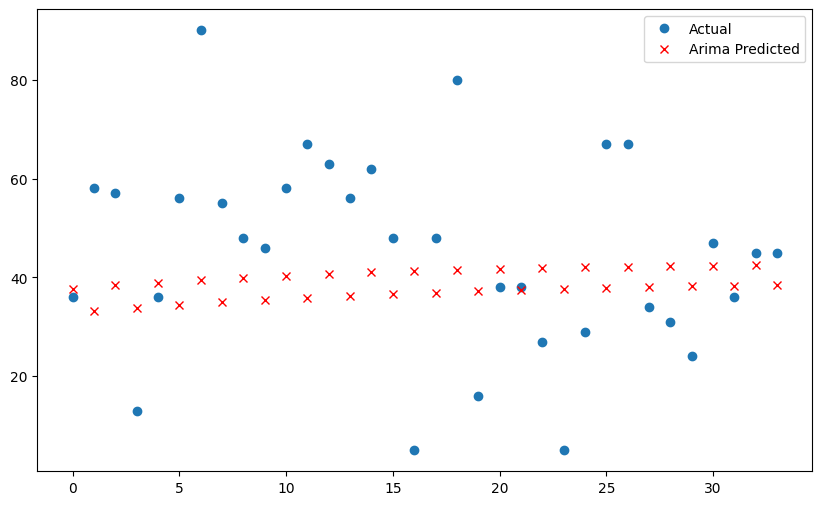

                               SARIMAX Results                                
Dep. Variable:             Guantánamo   No. Observations:                  387
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1571.069
Date:                Wed, 29 Jan 2025   AIC                           3154.139
Time:                        23:43:52   BIC                           3177.889
Sample:                             0   HQIC                          3163.557
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2392     12.534      3.290      0.001      16.673      65.806
ar.L1         -0.0548      0.014     -3.997      0.000      -0.082      -0.028
ar.L2          0.9346      0.015     63.979      0.0

In [10]:
augmented_evaluate_model(models, d_from_diff, curr_train, curr_test)

Hospitalized

In [ ]:
models, test_sets, d_from_diff, train_sets = auto_arima_train(province_data_dict, "AATotalAPS_Ingresos")

In [ ]:
evaluate_models(models, test_sets, d_from_diff, train_sets, "AATotalAPS_Ingresos")

In [19]:
# auto_model = model
# curr_test = pinar_del_rio_test

# auto_predictions = auto_model.predict(n_periods=len(curr_test))
# d = d_from_diff[curr_province]
# # Fit ARIMA model on the training set
# model = ARIMA(pinar_del_rio_train, order = (auto_model.order[0], d, auto_model.order[2]))
# model_fit = model.fit()
#  # Make predictions on the test set
# predictions = model_fit.forecast(steps=len(curr_test))
# print(f' AutoArima Predictions for {curr_province}: incomes. d = {auto_model.order[1]}')
# print(auto_predictions)
# print()
# print(f'Arima Predictions for {curr_province}: incomes. d = {d}')
# print(predictions)


#         # Calculate evaluation metrics
# auto_mae = mean_absolute_error(curr_test, auto_predictions)
# auto_mse = mean_squared_error(curr_test, auto_predictions)
# auto_rmse = np.sqrt(auto_mse)
# auto_mape = np.mean(np.abs((curr_test - auto_predictions) / curr_test)) * 100
# auto_nmse = auto_mse / np.var(curr_test)
#         # Calculate evaluation metrics
# mae = mean_absolute_error(curr_test, predictions)
# mse = mean_squared_error(curr_test, predictions)
# rmse = np.sqrt(mse)
# mape = np.mean(np.abs((curr_test - predictions) / curr_test)) * 100
# nmse = mse / np.var(curr_test)

# print(f'MAE for autoArima: {auto_mae}')
# print(f'MSE for autoArima: {auto_mse}')
# print(f'RMSE for autoArima: {auto_rmse}')
# print(f'MAPE for autoArima: {auto_mape}%')
# print(f'NMSEfor autoArima: {auto_nmse}')

# print()
# print(f'MAE for ARIMA: {mae}')
# print(f'MSE for ARIMA: {mse}')
# print(f'RMSE for ARIMA: {rmse}')
# print(f'MAPE for ARIMA: {mape}%')
# print(f'NMSE for ARIMA: {nmse}')

#         # Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
# plt.plot(curr_test.index, auto_predictions, 'x', label='AutoArima Predicted', color='red') # Use 'x' for markers
# plt.legend()
# plt.show()

#         # Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
# plt.plot(curr_test.index, predictions, 'x', label='Arima Predicted', color='red') # Use 'x' for markers
# plt.legend()
# plt.show()
# print(model_fit.summary())

Hospitalized


In [12]:
curr_train = pd.read_csv('data/Anexos_7/training/total_hospitalized_augmented_training_data.csv')
curr_test = pd.read_csv('data/Anexos_7/test/total_hospitalized_test_data.csv')


In [13]:
# Convert the 'Date' column to datetime format
curr_train['Date'] = pd.to_datetime(curr_train['Date'], format='%Y-%m-%d')
curr_test['Date'] = pd.to_datetime(curr_test['Date'], format='%Y-%m-%d')
# Select the 'Date' and 'Pinar del Rio' columns

pinar_del_rio_train = curr_train[['Date', 'Pinar del Rio']]
pinar_del_rio_test = curr_test[['Date', 'Pinar del Rio']]

pinar_del_rio_test.set_index('Date', inplace=True)
pinar_del_rio_train.set_index('Date', inplace=True)

print(pinar_del_rio_train.head())
print(pinar_del_rio_test.head())


            Pinar del Rio
Date                     
2022-09-19         1143.0
2022-09-20         1166.0
2022-09-21         1171.0
2022-09-22         1195.0
2022-09-23         1208.0
            Pinar del Rio
Date                     
2023-10-11            733
2023-10-18            848
2023-10-19            814
2023-10-22            816
2023-10-23            805


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Best parameters for 'Guantánamo': (manual diff d=1, auto_arima suggested d=1)



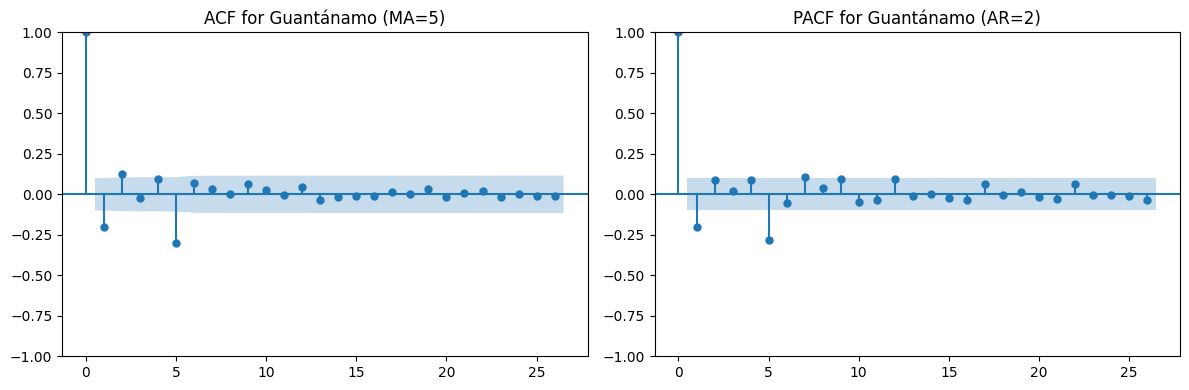

In [14]:
rovince = "Pinar del Rio"
d_from_diff = {}

# 1. Usamos auto_arima sobre la serie numérica
#    (ya no le pasamos la columna 'Date', pues ahora es índice)
model = pm.auto_arima(
    pinar_del_rio_train,  # DataFrame con 1 columna numérica
    seasonal=False,
    stepwise=True,
    suppress_warnings=True
)

# 2. Chequeo de estacionariedad con adfuller y differencing manual
d = 0
result = adfuller(pinar_del_rio_train['Pinar del Rio'])  # adfuller requiere la serie

while result[1] > 0.05:  # mientras p-value > 0.05
    pinar_del_rio_train = pinar_del_rio_train.diff().dropna()
    d += 1
    result = adfuller(pinar_del_rio_train['Pinar del Rio'])

d_from_diff[province] = d
print(f"Best parameters for '{province}': (manual diff d={d}, auto_arima suggested d={model.order[1]})\n")

# 3. Graficar ACF y PACF de la serie ya diferenciada (si procede)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(pinar_del_rio_train['Pinar del Rio'], ax=axes[0])
plot_pacf(pinar_del_rio_train['Pinar del Rio'], ax=axes[1])
axes[0].set_title(f'ACF for {province} (MA={model.order[2]})')
axes[1].set_title(f'PACF for {province} (AR={model.order[0]})')
plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 AutoArima Predictions for Pinar del Rio: hospitalized. d = 1
2023-10-11    766.605668
2023-10-12    794.857128
2023-10-13    788.997264
2023-10-14    783.975124
2023-10-15    754.207049
2023-10-16    764.298660
2023-10-17    766.825518
2023-10-18    764.142136
2023-10-19    764.488681
2023-10-20    764.889413
2023-10-21    764.700842
2023-10-22    764.683017
2023-10-23    764.724132
2023-10-24    764.714873
2023-10-25    764.709946
2023-10-26    764.713209
2023-10-27    764.713138
2023-10-28    764.712543
2023-10-29    764.712739
2023-10-30    764.712792
2023-10-31    764.712738
2023-11-01    764.712745
2023-11-02    764.712753
2023-11-03    764.712749
2023-11-04    764.712749
2023-11-05    764.712750
2023-11-06    764.712750
2023-11-07    764.712749
2023-11-08    764.712749
2023-11-09    764.712749
2023-11-10    764.712749
2023-11-11    764.712749
2023-11-12    764.712749
2023-11-13    764.712749
Freq: D, dtype: float64

Arima Predictions for Pinar del Rio: hospitalized. d = 1
2023-1

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


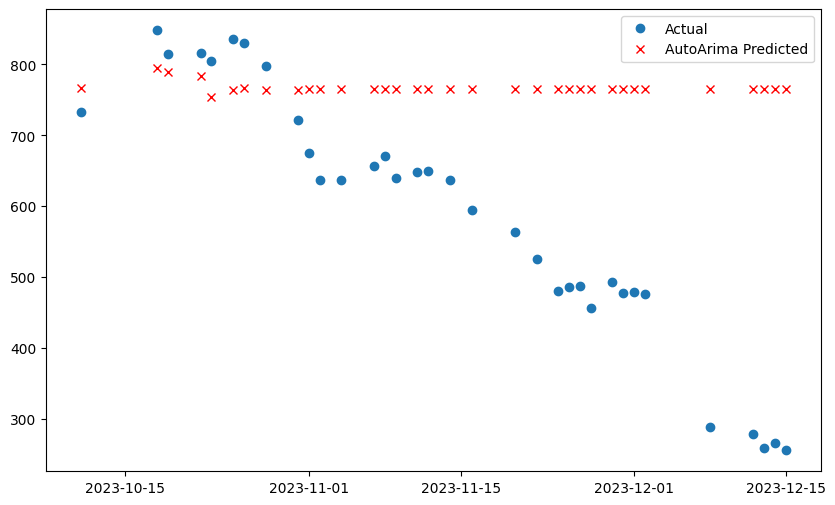

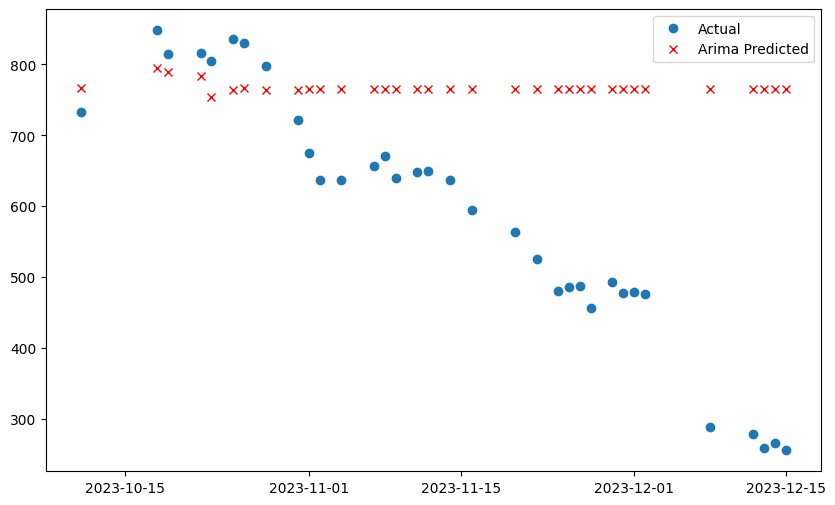

                               SARIMAX Results                                
Dep. Variable:          Pinar del Rio   No. Observations:                  387
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -2110.893
Date:                Wed, 29 Jan 2025   AIC                           4237.785
Time:                        00:43:09   BIC                           4269.432
Sample:                    09-19-2022   HQIC                          4250.335
                         - 10-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3071      0.164     -1.869      0.062      -0.629       0.015
ar.L2         -0.1890      0.278     -0.679      0.497      -0.734       0.356
ma.L1          0.1374      0.174      0.788      0.4

In [10]:
auto_model = model
curr_test = pinar_del_rio_test

auto_predictions = auto_model.predict(n_periods=len(curr_test))
d = d_from_diff[province]
# Fit ARIMA model on the training set
model = ARIMA(pinar_del_rio_train, order = (auto_model.order[0], d, auto_model.order[2]))
model_fit = model.fit()
 # Make predictions on the test set
predictions = model_fit.forecast(steps=len(curr_test))
print(f' AutoArima Predictions for {province}: hospitalized. d = {auto_model.order[1]}')
print(auto_predictions)
print()
print(f'Arima Predictions for {province}: hospitalized. d = {d}')
print(predictions)


        # Calculate evaluation metrics
auto_mae = mean_absolute_error(curr_test, auto_predictions)
auto_mse = mean_squared_error(curr_test, auto_predictions)
auto_rmse = np.sqrt(auto_mse)
auto_mape = np.mean(np.abs((curr_test - auto_predictions) / curr_test)) * 100
auto_nmse = auto_mse / np.var(curr_test)
        # Calculate evaluation metrics
mae = mean_absolute_error(curr_test, predictions)
mse = mean_squared_error(curr_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((curr_test - predictions) / curr_test)) * 100
nmse = mse / np.var(curr_test)

print(f'MAE for autoArima: {auto_mae}')
print(f'MSE for autoArima: {auto_mse}')
print(f'RMSE for autoArima: {auto_rmse}')
print(f'MAPE for autoArima: {auto_mape}%')
print(f'NMSEfor autoArima: {auto_nmse}')

print()
print(f'MAE for ARIMA: {mae}')
print(f'MSE for ARIMA: {mse}')
print(f'RMSE for ARIMA: {rmse}')
print(f'MAPE for ARIMA: {mape}%')
print(f'NMSE for ARIMA: {nmse}')

        # Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
plt.plot(curr_test.index, auto_predictions, 'x', label='AutoArima Predicted', color='red') # Use 'x' for markers
plt.legend()
plt.show()

        # Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
plt.plot(curr_test.index, predictions, 'x', label='Arima Predicted', color='red') # Use 'x' for markers
plt.legend()
plt.show()
print(model_fit.summary())

Discharges

In [15]:
curr_train= pd.read_csv('data/Anexos_7/training/total_discharges_augmented_training_data.csv')
curr_test = pd.read_csv('data/Anexos_7/test/total_discharges_test_data.csv')

In [16]:
# Convert the 'Date' column to datetime format
curr_train['Date'] = pd.to_datetime(curr_train['Date'], format='%Y-%m-%d')
curr_test['Date'] = pd.to_datetime(curr_test['Date'], format='%Y-%m-%d')
# Select the 'Date' and 'Pinar del Rio' columns

pinar_del_rio_train = curr_train[['Date', 'Pinar del Rio']]
pinar_del_rio_test = curr_test[['Date', 'Pinar del Rio']]

pinar_del_rio_test.set_index('Date', inplace=True)
pinar_del_rio_train.set_index('Date', inplace=True)

print(pinar_del_rio_train.head())
print(pinar_del_rio_test.head())

            Pinar del Rio
Date                     
2022-09-19           37.0
2022-09-20           78.0
2022-09-21           86.0
2022-09-22          110.0
2022-09-23          106.0
            Pinar del Rio
Date                     
2023-10-11            111
2023-10-18            101
2023-10-19            134
2023-10-22             21
2023-10-23            115


Best parameters for province 'Pinar del Rio': (d=1 from differencing, d=1 d from AutoArima)



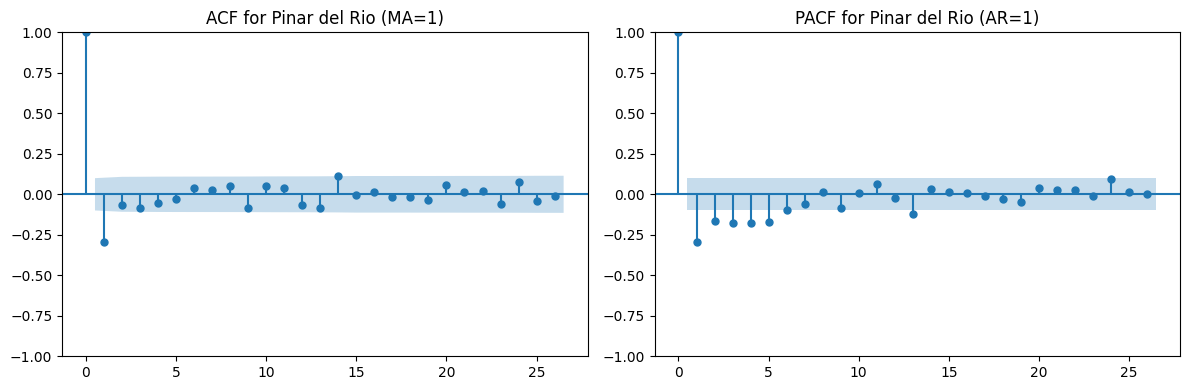

In [13]:
province = "Pinar del Rio"
d_from_diff = {}
# Use auto_arima to find the best parameters on the training set
model = pm.auto_arima(pinar_del_rio_train, seasonal=False, stepwise=True, suppress_warnings=True)



    # Check for stationarity and apply differencing if needed
d = 0
result = adfuller(curr_train['Pinar del Rio'])
while result[1] > 0.05:
    curr_train = curr_train.diff().dropna()
    d += 1
    result = adfuller(curr_train['Pinar del Rio'])
d_from_diff[province] = d
print(f"Best parameters for province '{province}': (d={d} from differencing, d={model.order[1]} d from AutoArima)\n")

    # Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(curr_train['Pinar del Rio'], ax=axes[0])
plot_pacf(curr_train['Pinar del Rio'], ax=axes[1])
axes[0].set_title(f'ACF for {province} (MA={model.order[2]})')
axes[1].set_title(f'PACF for {province} (AR={model.order[0]})')
plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 AutoArima Predictions for Pinar del Rio: discharges. d = 1
2023-10-11    59.829819
2023-10-12    69.921141
2023-10-13    73.580339
2023-10-14    74.907194
2023-10-15    75.388322
2023-10-16    75.562784
2023-10-17    75.626045
2023-10-18    75.648984
2023-10-19    75.657302
2023-10-20    75.660318
2023-10-21    75.661411
2023-10-22    75.661808
2023-10-23    75.661952
2023-10-24    75.662004
2023-10-25    75.662023
2023-10-26    75.662030
2023-10-27    75.662032
2023-10-28    75.662033
2023-10-29    75.662033
2023-10-30    75.662034
2023-10-31    75.662034
2023-11-01    75.662034
2023-11-02    75.662034
2023-11-03    75.662034
2023-11-04    75.662034
2023-11-05    75.662034
2023-11-06    75.662034
2023-11-07    75.662034
2023-11-08    75.662034
2023-11-09    75.662034
2023-11-10    75.662034
2023-11-11    75.662034
2023-11-12    75.662034
2023-11-13    75.662034
Freq: D, dtype: float64

Arima Predictions for Pinar del Rio: discharges. d = 1
2023-10-11    59.829819
2023-10-12    69.921

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


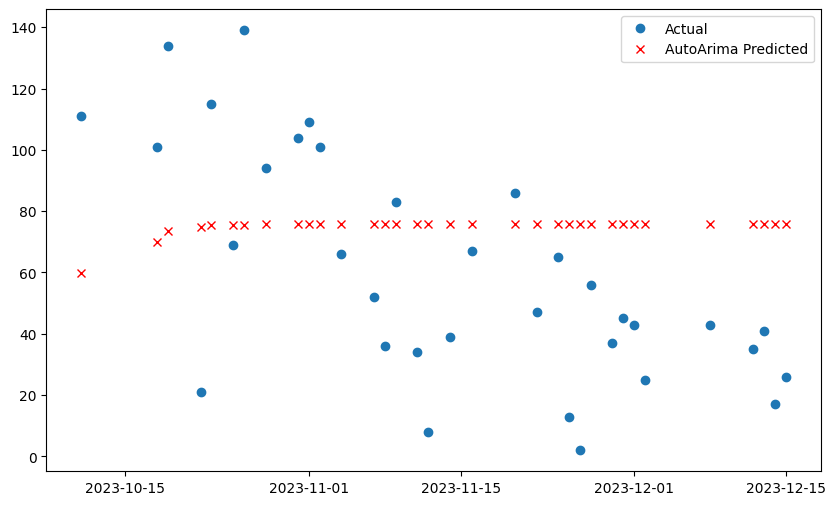

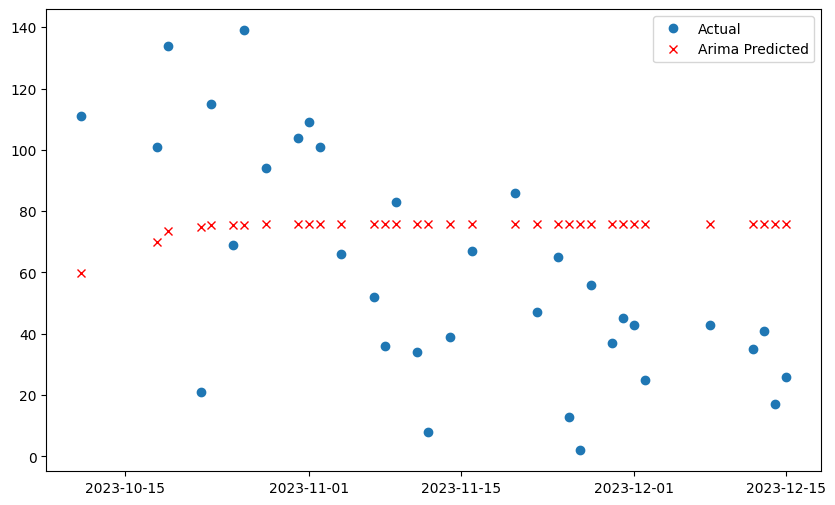

                               SARIMAX Results                                
Dep. Variable:          Pinar del Rio   No. Observations:                  387
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1948.271
Date:                Wed, 29 Jan 2025   AIC                           3902.543
Time:                        00:43:13   BIC                           3914.410
Sample:                    09-19-2022   HQIC                          3907.249
                         - 10-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3626      0.055      6.537      0.000       0.254       0.471
ma.L1         -0.8233      0.045    -18.439      0.000      -0.911      -0.736
sigma2      1415.6148     49.537     28.577      0.0

In [14]:
auto_model = model
curr_test = pinar_del_rio_test

auto_predictions = auto_model.predict(n_periods=len(curr_test))
d = d_from_diff[province]
# Fit ARIMA model on the training set
model = ARIMA(pinar_del_rio_train, order = (auto_model.order[0], d, auto_model.order[2]))
model_fit = model.fit()
 # Make predictions on the test set
predictions = model_fit.forecast(steps=len(curr_test))
print(f' AutoArima Predictions for {province}: discharges. d = {auto_model.order[1]}')
print(auto_predictions)
print()
print(f'Arima Predictions for {province}: discharges. d = {d}')
print(predictions)


        # Calculate evaluation metrics
auto_mae = mean_absolute_error(curr_test, auto_predictions)
auto_mse = mean_squared_error(curr_test, auto_predictions)
auto_rmse = np.sqrt(auto_mse)
auto_mape = np.mean(np.abs((curr_test - auto_predictions) / curr_test)) * 100
auto_nmse = auto_mse / np.var(curr_test)
        # Calculate evaluation metrics
mae = mean_absolute_error(curr_test, predictions)
mse = mean_squared_error(curr_test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((curr_test - predictions) / curr_test)) * 100
nmse = mse / np.var(curr_test)

print(f'MAE for autoArima: {auto_mae}')
print(f'MSE for autoArima: {auto_mse}')
print(f'RMSE for autoArima: {auto_rmse}')
print(f'MAPE for autoArima: {auto_mape}%')
print(f'NMSEfor autoArima: {auto_nmse}')

print()
print(f'MAE for ARIMA: {mae}')
print(f'MSE for ARIMA: {mse}')
print(f'RMSE for ARIMA: {rmse}')
print(f'MAPE for ARIMA: {mape}%')
print(f'NMSE for ARIMA: {nmse}')

        # Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
plt.plot(curr_test.index, auto_predictions, 'x', label='AutoArima Predicted', color='red') # Use 'x' for markers
plt.legend()
plt.show()

        # Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(curr_test.index, curr_test, 'o', label='Actual') # Use 'o' for markers
plt.plot(curr_test.index, predictions, 'x', label='Arima Predicted', color='red') # Use 'x' for markers
plt.legend()
plt.show()
print(model_fit.summary())

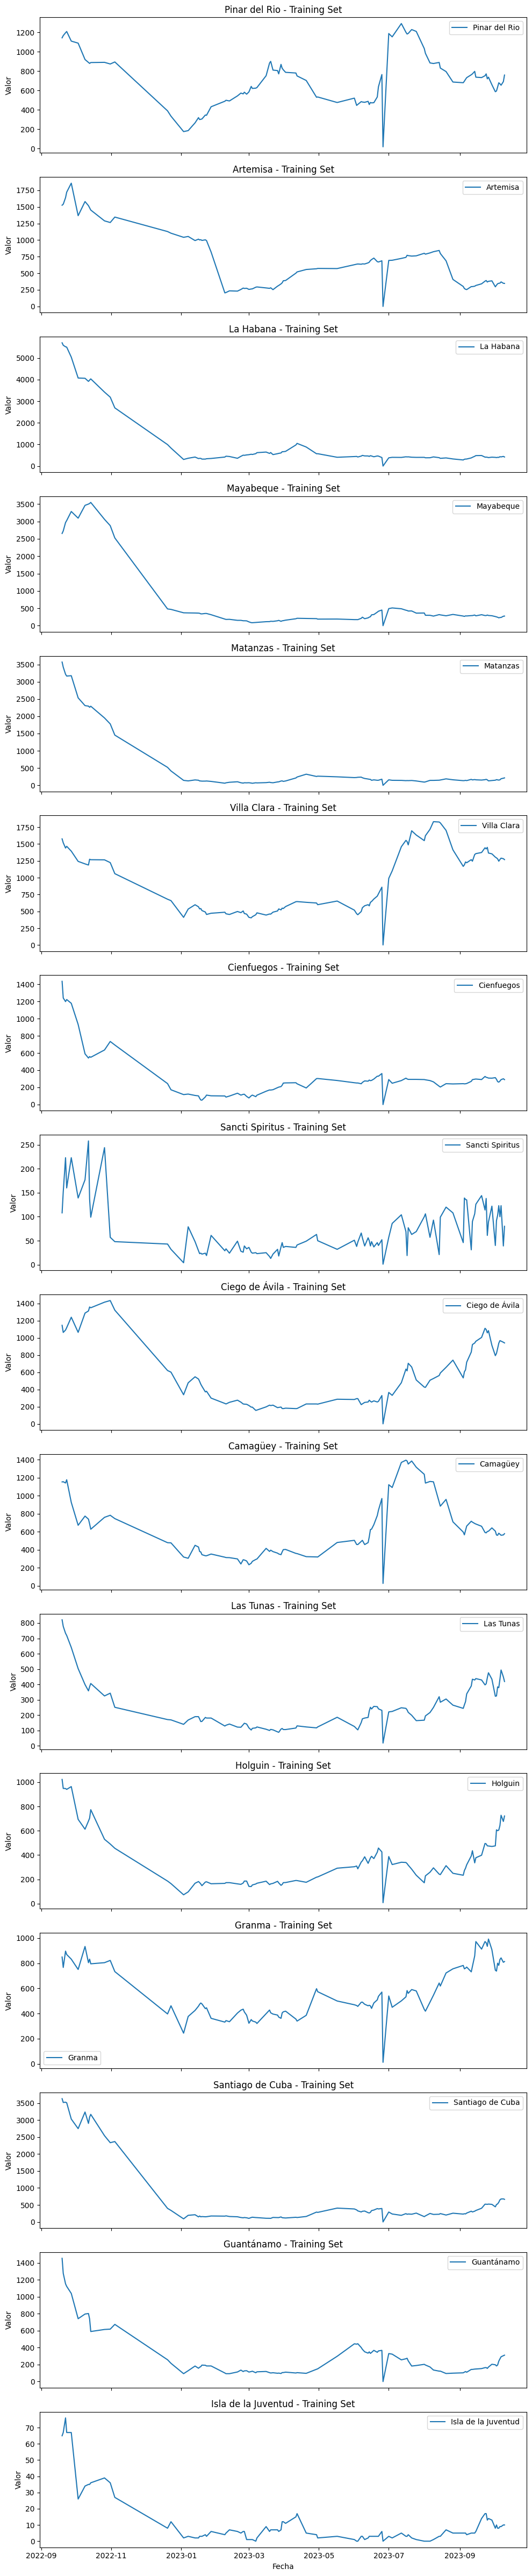

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def show_training_set_by_province(csv_path):
    # 1. Leer el CSV
    df_train = pd.read_csv(csv_path, parse_dates=['Date'])

    # 2. Convertir 'Date' a índice
    df_train.set_index('Date', inplace=True)

    # 3. Definir columnas que NO son provincias
    ignore_cols = ["Day", "Month", "Year", "DayOfYear"]  # Ajusta según tus metadatos
    # 4. Extraer solo las columnas que representan provincias
    province_cols = [col for col in df_train.columns if col not in ignore_cols]

    # 5. Graficar todo en una única figura con un subplot por provincia
    fig, axes = plt.subplots(nrows=len(province_cols), ncols=1, figsize=(10, 3*len(province_cols)), sharex=True)

    if len(province_cols) == 1:
        # Si solo hubiera una provincia, axes sería un solo objeto en vez de array
        axes = [axes]

    for i, province in enumerate(province_cols):
        axes[i].plot(df_train.index, df_train[province], label=province)
        axes[i].set_title(f"{province} - Training Set")
        axes[i].set_ylabel("Valor")
        axes[i].legend()

    plt.xlabel("Fecha")
    plt.tight_layout()
    plt.show()

# Llamada de ejemplo
csv_training_path = "data/Anexos_7/training/total_hospitalized_training_data.csv"
show_training_set_by_province(csv_training_path)
